In [29]:
# Machine Learning Workflow: Train-Test-Split
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
print("Bibliotheken erfolgreich geladen!")
# 1. CSV-Datei laden
data = pd.read_csv('../data/raw/OnlineRetail.csv', encoding='ISO-8859-1')

# 2. Aufteilen in Train(80%) und Test(20%)
train_data, test_data = train_test_split(
    data, 
    test_size=0.2,
    random_state=42
)
# 3. Ergebnisse prüfen
print("Trainingsdaten:", train_data.shape)
print("Testdaten:", test_data.shape)

train_data.to_csv('../data/raw/Onlineretail_train.csv', index=False)
test_data.to_csv('../data/raw/OnlineRetail_test.csv', index=False)
print(f"Anzahl Kunden:{train_data['CustomerID'].nunique()}")
print(f"Traindata und Testdata erfolgreich gespeichert.")

Bibliotheken erfolgreich geladen!
Trainingsdaten: (433527, 8)
Testdaten: (108382, 8)
Anzahl Kunden:4352
Traindata und Testdata erfolgreich gespeichert.


In [11]:
# Trainingsdaten laden & erste Exploration
# Daten laden
df_train = pd.read_csv('../data/raw/Onlineretail_train.csv', encoding='ISO-8859-1')

# Erste Blick auf Daten
print("- Datensatz Übersicht:")
print(f"Wir haben {df_train.shape[0]} Zeilen, {df_train.shape[1]} Spalten")
print("\n- Erste 5 Zeilen:")
print(df_train.head())
print("\n- Datentypen:")
print(df_train.dtypes)
print("\n- Statistische Überblick:")
relevant_colms=['Quantity', 'UnitPrice']
print(df_train[relevant_colms].describe())
print("\nFehlende Werte:")
print(df_train.isnull().sum())

- Datensatz Übersicht:
Wir haben 433527 Zeilen, 8 Spalten

- Erste 5 Zeilen:
  InvoiceNo StockCode                     Description  Quantity  \
0    573745     22138   BAKING SET 9 PIECE RETROSPOT          6   
1    562670     22791    T-LIGHT GLASS FLUTED ANTIQUE        12   
2    541604    51014L          FEATHER PEN,LIGHT PINK        24   
3    551855     22622  BOX OF VINTAGE ALPHABET BLOCKS         2   
4    561474     22384         LUNCH BAG PINK POLKADOT       100   

       InvoiceDate  UnitPrice  CustomerID         Country  
0   11/1/2011 8:53       4.95     17419.0  United Kingdom  
1   8/8/2011 13:42       1.25     14911.0            EIRE  
2  1/19/2011 17:23       0.85     14572.0  United Kingdom  
3   5/4/2011 15:08      11.95     12836.0  United Kingdom  
4  7/27/2011 13:18       1.45     14680.0  United Kingdom  

- Datentypen:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
Custome

In [12]:
# Datenbereinigung
print("\nDatenbereinigung startet....")

# 1. Fehlende CustomerID entfernen
df_clean = df_train[df_train['CustomerID'].notna()].copy()
print(f"\nNach Entfernung fehlender CustomerID: {df_clean.shape[0]} Zeilen")

# 2. Negative Mengen und Preisen entfernen
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]
print(f"\nNach Entfernung negative Werte: {df_clean.shape[0]} Zeilen")

# 3. Duplikate entfernen
df_clean = df_clean.drop_duplicates()
print(f"\nNach Entfernung Duplikate: {df_clean.shape[0]} Zeilen")

# 4.InvoiceDate in Datetime konvertieren
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# 5.Gesamtbetrag berechnen
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']

print("\nDatenbereinigung abgeschlossen!")
print(f"Finale Daten: {df_clean.shape}")
print(f"Anzahl Kunden: {df_clean['CustomerID'].nunique()}")
relevant_cols =['Quantity', 'UnitPrice', 'TotalAmount']
print(df_clean[relevant_cols].describe())


Datenbereinigung startet....

Nach Entfernung fehlender CustomerID: 325570 Zeilen

Nach Entfernung negative Werte: 318459 Zeilen

Nach Entfernung Duplikate: 315071 Zeilen

Datenbereinigung abgeschlossen!
Finale Daten: (315071, 9)
Anzahl Kunden: 4322
            Quantity      UnitPrice    TotalAmount
count  315071.000000  315071.000000  315071.000000
mean       12.953077       3.112769      22.532848
std       150.438791      18.069322     316.527098
min         1.000000       0.001000       0.001000
25%         2.000000       1.250000       4.950000
50%         6.000000       1.950000      12.390000
75%        12.000000       3.750000      19.800000
max     80995.000000    4161.060000  168469.600000


VERGLEICH: ORIGINAL vs. BEREINIGTE DATEN

STATISTISCHE ÜBERSICHT:
----------------------------------------------------------------------
ORIGINAL:   433,527 Zeilen
BEREINIGT:  315,071 Zeilen
ENTFERNT:   118,456 Zeilen (27.32%)

Kunden (Original):   4352
Kunden (Bereinigt):  4322

EXTREMWERTE-ANALYSE:

Quantity:
  Original  - Min: -74,215.00 | Max: 80,995.00 | Median: 3.00
  Bereinigt - Min: 1.00 | Max: 80,995.00 | Median: 6.00

UnitPrice:
  Original  - Min: -11,062.06 | Max: 38,970.00 | Median: 2.08
  Bereinigt - Min: 0.00 | Max: 4,161.06 | Median: 1.95

TotalAmount:
  Original  - Min: -77,183.60 | Max: 168,469.60 | Median: 9.78
  Bereinigt - Min: 0.00 | Max: 168,469.60 | Median: 12.39


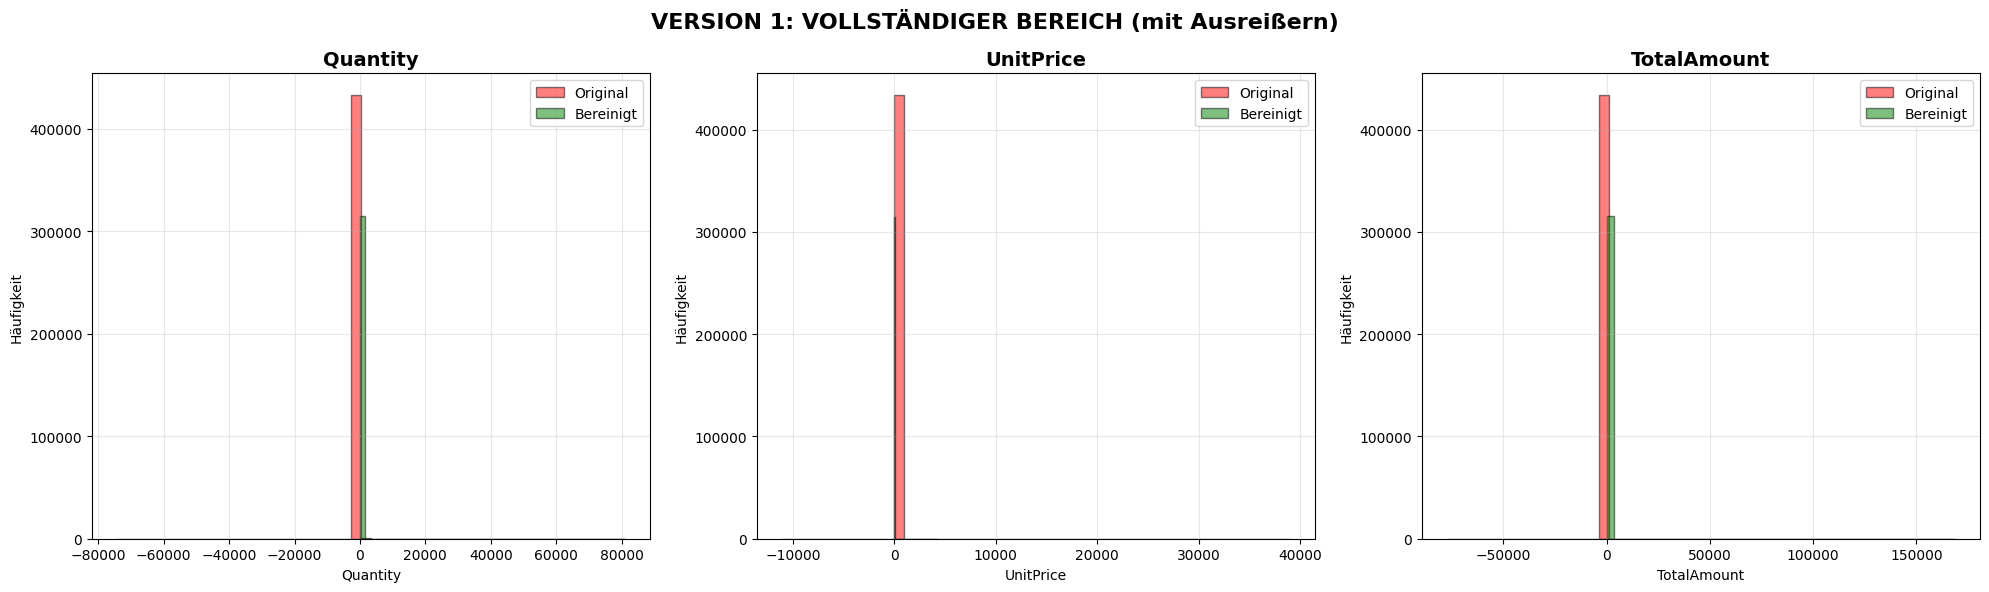

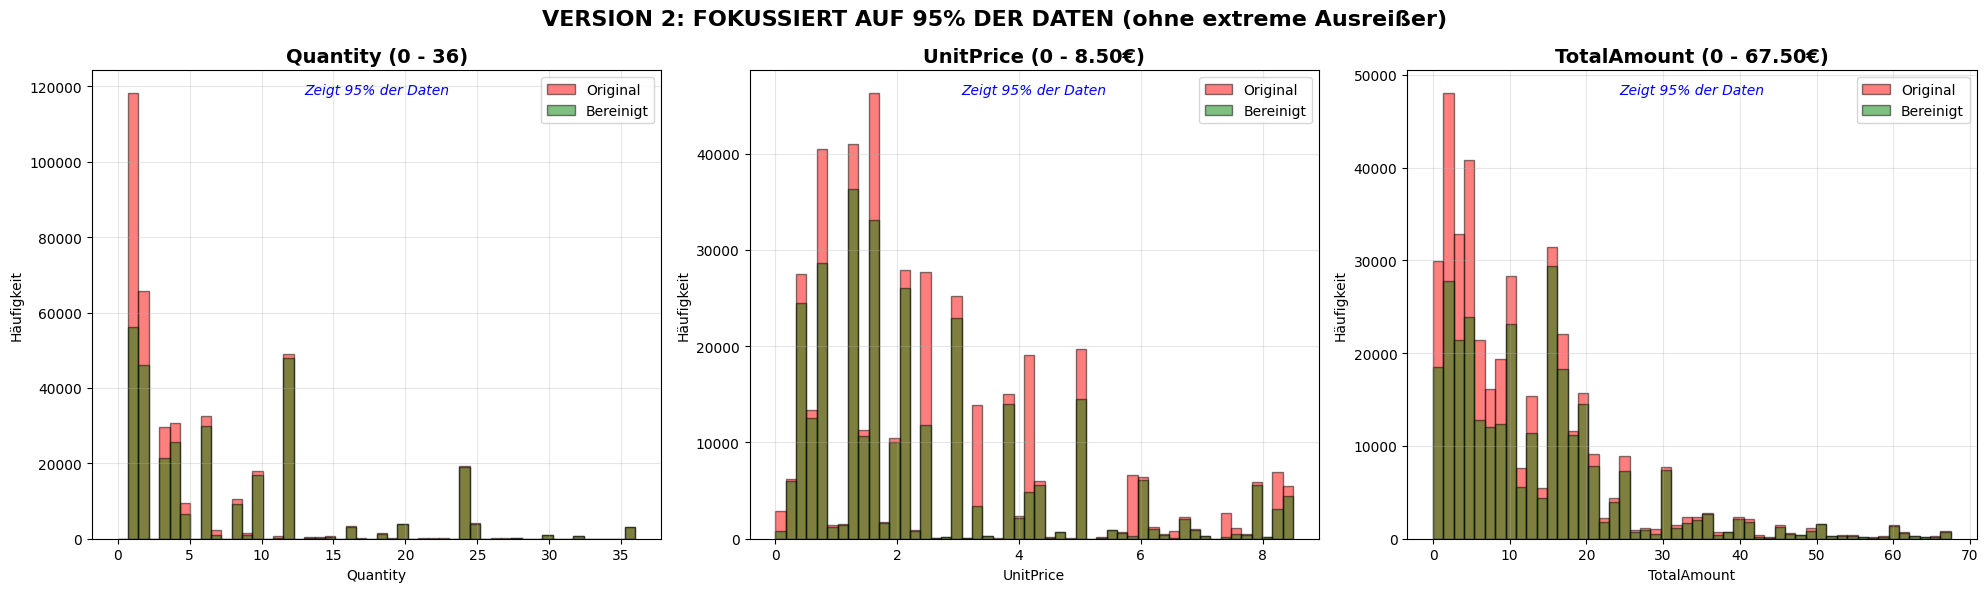


FERTIG! Daten sind bereit für RFM-Analyse!


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("=" * 70)
print("VERGLEICH: ORIGINAL vs. BEREINIGTE DATEN")
print("=" * 70)

# Datetime konvertieren für df_train
df_train['InvoiceDate'] = pd.to_datetime(df_train['InvoiceDate'], errors='coerce')
df_train['TotalAmount'] = df_train['Quantity'] * df_train['UnitPrice']
print("\nSTATISTISCHE ÜBERSICHT:")
print("-" * 70)
print(f"ORIGINAL:   {len(df_train):,} Zeilen")
print(f"BEREINIGT:  {len(df_clean):,} Zeilen")
print(f"ENTFERNT:   {len(df_train) - len(df_clean):,} Zeilen ({((len(df_train) - len(df_clean))/len(df_train)*100):.2f}%)")
print(f"\nKunden (Original):   {df_train['CustomerID'].nunique()}")
print(f"Kunden (Bereinigt):  {df_clean['CustomerID'].nunique()}")

# EXTREMWERTE ANALYSIEREN
print("\n" + "=" * 70)
print("EXTREMWERTE-ANALYSE:")
print("=" * 70)

for col in ['Quantity', 'UnitPrice', 'TotalAmount']:
    print(f"\n{col}:")
    print(f"  Original  - Min: {df_train[col].min():,.2f} | Max: {df_train[col].max():,.2f} | Median: {df_train[col].median():.2f}")
    print(f"  Bereinigt - Min: {df_clean[col].min():,.2f} | Max: {df_clean[col].max():,.2f} | Median: {df_clean[col].median():.2f}")

# PLOTS MIT ZWEI VERSIONEN
# VERSION 1: Vollständiger Bereich (mit Ausreißern)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('VERSION 1: VOLLSTÄNDIGER BEREICH (mit Ausreißern)', fontsize=16, fontweight='bold')

# Quantity
axes[0].hist(df_train['Quantity'], bins=50, color='red', alpha=0.5, label='Original', edgecolor='black')
axes[0].hist(df_clean['Quantity'], bins=50, color='green', alpha=0.5, label='Bereinigt', edgecolor='black')
axes[0].set_title('Quantity', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Häufigkeit')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# UnitPrice
axes[1].hist(df_train['UnitPrice'], bins=50, color='red', alpha=0.5, label='Original', edgecolor='black')
axes[1].hist(df_clean['UnitPrice'], bins=50, color='green', alpha=0.5, label='Bereinigt', edgecolor='black')
axes[1].set_title('UnitPrice', fontweight='bold', fontsize=14)
axes[1].set_xlabel('UnitPrice')
axes[1].set_ylabel('Häufigkeit')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# TotalAmount
axes[2].hist(df_train['TotalAmount'], bins=50, color='red', alpha=0.5, label='Original', edgecolor='black')
axes[2].hist(df_clean['TotalAmount'], bins=50, color='green', alpha=0.5, label='Bereinigt', edgecolor='black')
axes[2].set_title('TotalAmount', fontweight='bold', fontsize=14)
axes[2].set_xlabel('TotalAmount')
axes[2].set_ylabel('Häufigkeit')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# VERSION 2: Sinnvoller Bereich (95% der Daten)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('VERSION 2: FOKUSSIERT AUF 95% DER DATEN (ohne extreme Ausreißer)', fontsize=16, fontweight='bold')

# Quantity (nur 0-100 zeigen, wo die meisten Daten liegen)
q_limit = np.percentile(df_clean['Quantity'], 95)  # 95% der Daten
axes[0].hist(df_train['Quantity'], bins=50, color='red', alpha=0.5, label='Original', edgecolor='black', range=(0, q_limit))
axes[0].hist(df_clean['Quantity'], bins=50, color='green', alpha=0.5, label='Bereinigt', edgecolor='black', range=(0, q_limit))
axes[0].set_title(f'Quantity (0 - {q_limit:.0f})', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Häufigkeit')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].annotate(f'Zeigt 95% der Daten', xy=(0.5, 0.95), xycoords='axes fraction', 
                ha='center', fontsize=10, color='blue', style='italic')

# UnitPrice (nur 0-50€ zeigen)
up_limit = np.percentile(df_clean['UnitPrice'], 95)
axes[1].hist(df_train['UnitPrice'], bins=50, color='red', alpha=0.5, label='Original', edgecolor='black', range=(0, up_limit))
axes[1].hist(df_clean['UnitPrice'], bins=50, color='green', alpha=0.5, label='Bereinigt', edgecolor='black', range=(0, up_limit))
axes[1].set_title(f'UnitPrice (0 - {up_limit:.2f}€)', fontweight='bold', fontsize=14)
axes[1].set_xlabel('UnitPrice')
axes[1].set_ylabel('Häufigkeit')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].annotate(f'Zeigt 95% der Daten', xy=(0.5, 0.95), xycoords='axes fraction', 
                ha='center', fontsize=10, color='blue', style='italic')

# TotalAmount (nur 0-500€ zeigen)
ta_limit = np.percentile(df_clean['TotalAmount'], 95)
axes[2].hist(df_train['TotalAmount'], bins=50, color='red', alpha=0.5, label='Original', edgecolor='black', range=(0, ta_limit))
axes[2].hist(df_clean['TotalAmount'], bins=50, color='green', alpha=0.5, label='Bereinigt', edgecolor='black', range=(0, ta_limit))
axes[2].set_title(f'TotalAmount (0 - {ta_limit:.2f}€)', fontweight='bold', fontsize=14)
axes[2].set_xlabel('TotalAmount')
axes[2].set_ylabel('Häufigkeit')
axes[2].legend()
axes[2].grid(True, alpha=0.3)
axes[2].annotate(f'Zeigt 95% der Daten', xy=(0.5, 0.95), xycoords='axes fraction', 
                ha='center', fontsize=10, color='blue', style='italic')

plt.tight_layout()
plt.show()

print("\nFERTIG! Daten sind bereit für RFM-Analyse!")

In [16]:
# RFM-Analyse erstellen
print("="*50)
print("Feature Engineering: RFM-Analyse")
print("="*50)

# Referenzdatum berechnen(1 Tag nach dem letzten Kauf im Datensatz)
snapshot_date = df_clean['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f"Referenzdatum: {snapshot_date}")

# RFM pro Kunden berechnen
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x : (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalAmount': 'sum'
}).reset_index()

rfm.columns =['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Ergebnisse
print(f"\nRFM-Features erstellt für {len(rfm)} Kunden")
print("\nErste 10 Kunden:")
print(rfm.head(10))
print("\nRFM Statistiken:")
relevant_colm=['Recency', 'Frequency', 'Monetary']
print(rfm[relevant_colm].describe())

# Prüfen auf problematische Werte
print(f"Fehlende Werte: {rfm.isnull().sum().sum()}")
print(f"Negative Werte in Recency: {(rfm['Recency'] < 0).sum()}")
print(f"Null-Werte in Frequency: {(rfm['Frequency'] == 0).sum()}")
print(f"Nul-Werte in Monetary: {(rfm['Monetary'] <= 0).sum()}")

Feature Engineering: RFM-Analyse
Referenzdatum: 2011-12-10 12:50:00

RFM-Features erstellt für 4322 Kunden

Erste 10 Kunden:
   CustomerID  Recency  Frequency  Monetary
0     12347.0        2          7   3653.22
1     12348.0       75          4   1353.72
2     12349.0       19          1   1159.54
3     12350.0      310          1    291.50
4     12352.0       36          8   1975.96
5     12353.0      204          1     29.30
6     12354.0      232          1    984.95
7     12355.0      214          1    294.10
8     12356.0       23          3   2322.83
9     12357.0       33          1   5307.56

RFM Statistiken:
           Recency    Frequency       Monetary
count  4322.000000  4322.000000    4322.000000
mean     92.497918     4.214484    1642.630056
std      99.939749     7.539239    7286.762792
min       1.000000     1.000000       3.750000
25%      18.000000     1.000000     241.697500
50%      51.000000     2.000000     542.990000
75%     142.000000     5.000000    1337.3625

Explorative Datenanalyse (EDA)


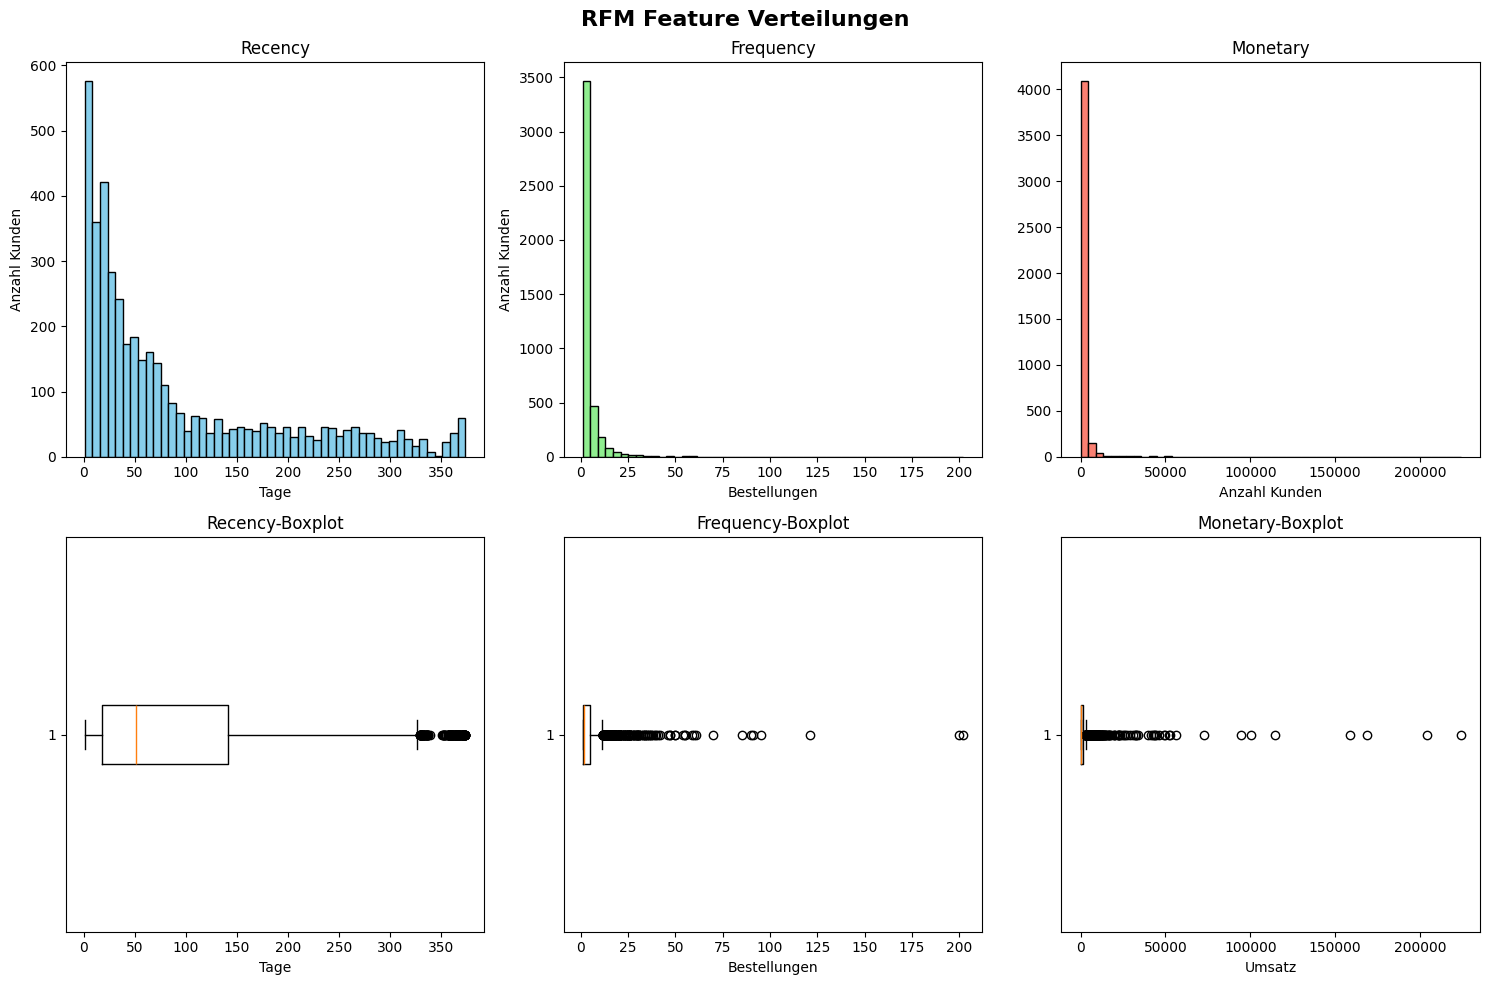


Ausreißer-Analyse

Recency:
 - 95% der Kunden: <= 311 Tag
 - Maximum: 374 Tage

Frequency:
 - 95% der Kunden: <= 13 Bestellungen
 - Maximum: 202 Bestellungen

Monetary:
 - 95% der Kunden: <= 4649.27 Pfund
 - Maximum: 224059.64 Pfund

Erkenntnis: Die sind stark rechtsschief!
 -> Wir brauchen Log-Transformation + Skalierung


In [21]:
# EDA: Verteilung visualisieren
print("="*50)
print("Explorative Datenanalyse (EDA)")
print("="*50)

# Figure mit Subplots erstllen
fig, axes = plt.subplots(2, 3, figsize=(15,10))
fig.suptitle('RFM Feature Verteilungen', fontsize=16, fontweight='bold')

# Original-Verteilung
axes[0, 0].hist(rfm['Recency'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Recency')
axes[0, 0].set_xlabel('Tage')
axes[0, 0].set_ylabel('Anzahl Kunden')

axes[0, 1].hist(rfm['Frequency'], bins=50, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Frequency')
axes[0, 1].set_xlabel('Bestellungen')
axes[0, 1].set_ylabel('Anzahl Kunden')

axes[0, 2].hist(rfm['Monetary'], bins=50, color='salmon', edgecolor='black')
axes[0, 2].set_title('Monetary')
axes[0, 2].set_xlabel('Umsatz')
axes[0, 2].set_xlabel('Anzahl Kunden')

# Boxplots - zeigen Ausreißer
axes[1, 0].boxplot(rfm['Recency'], vert=False)
axes[1, 0].set_title('Recency-Boxplot')
axes[1, 0].set_xlabel('Tage')

axes[1, 1].boxplot(rfm['Frequency'], vert=False)
axes[1, 1].set_title('Frequency-Boxplot')
axes[1, 1].set_xlabel('Bestellungen')

axes[1, 2].boxplot(rfm['Monetary'], vert=False)
axes[1, 2].set_title('Monetary-Boxplot')
axes[1, 2].set_xlabel('Umsatz')

plt.tight_layout()
plt.show()

# Statistische Kennzahlen für Ausreißer
print("\nAusreißer-Analyse")
print("\nRecency:")
print(f" - 95% der Kunden: <= {rfm['Recency'].quantile(0.95):.0f} Tag")
print(f" - Maximum: {rfm['Recency'].max():.0f} Tage")

print("\nFrequency:")
print(f" - 95% der Kunden: <= {rfm['Frequency'].quantile(0.95):.0f} Bestellungen")
print(f" - Maximum: {rfm['Frequency'].max():.0f} Bestellungen")

print("\nMonetary:")
print(f" - 95% der Kunden: <= {rfm['Monetary'].quantile(0.95):.2f} Pfund")
print(f" - Maximum: {rfm['Monetary'].max():.2f} Pfund")

print("\nErkenntnis: Die sind stark rechtsschief!")
print(" -> Wir brauchen Log-Transformation + Skalierung")


In [24]:
# Transformation & Skalierung
print("="*50)
print("Transformation & Skalierung")
print("="*50)

# Vorbereitung: Features extrahieren(Ohne CustomerID)
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']].copy()
print("Schritt 1: Log-Transformation")
print("-" * 50)

rfm_log = np.log1p(rfm_features) # log1p = log(1+x) -> vermeidet log(0)
print("Original vs. Log-transformiert:")
print("\nOriginal:")
print(rfm_features.describe())
print("\nNach Log-Transformationen:")
print(rfm_log.describe())

print("\n" + "="*50)
print("Schritt 2: StandardScaler anwenden")
print("="*50)

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)
# Als DataFrame
rfm_scaled_df = pd.DataFrame(
    rfm_scaled,
    columns=['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']
)
print("Nach Skalierung (sollte mean ~0 und std ~1 haben)\n")
print(rfm_scaled_df.describe())

Transformation & Skalierung
Schritt 1: Log-Transformation
--------------------------------------------------
Original vs. Log-transformiert:

Original:
           Recency    Frequency       Monetary
count  4322.000000  4322.000000    4322.000000
mean     92.497918     4.214484    1642.630056
std      99.939749     7.539239    7286.762792
min       1.000000     1.000000       3.750000
25%      18.000000     1.000000     241.697500
50%      51.000000     2.000000     542.990000
75%     142.000000     5.000000    1337.362500
max     374.000000   202.000000  224059.640000

Nach Log-Transformationen:
           Recency    Frequency     Monetary
count  4322.000000  4322.000000  4322.000000
mean      3.831574     1.338775     6.365190
std       1.338941     0.679156     1.268863
min       0.693147     0.693147     1.558145
25%       2.944439     0.693147     5.491815
50%       3.951244     1.098612     6.298931
75%       4.962845     1.791759     7.199201
max       5.926926     5.313206    12

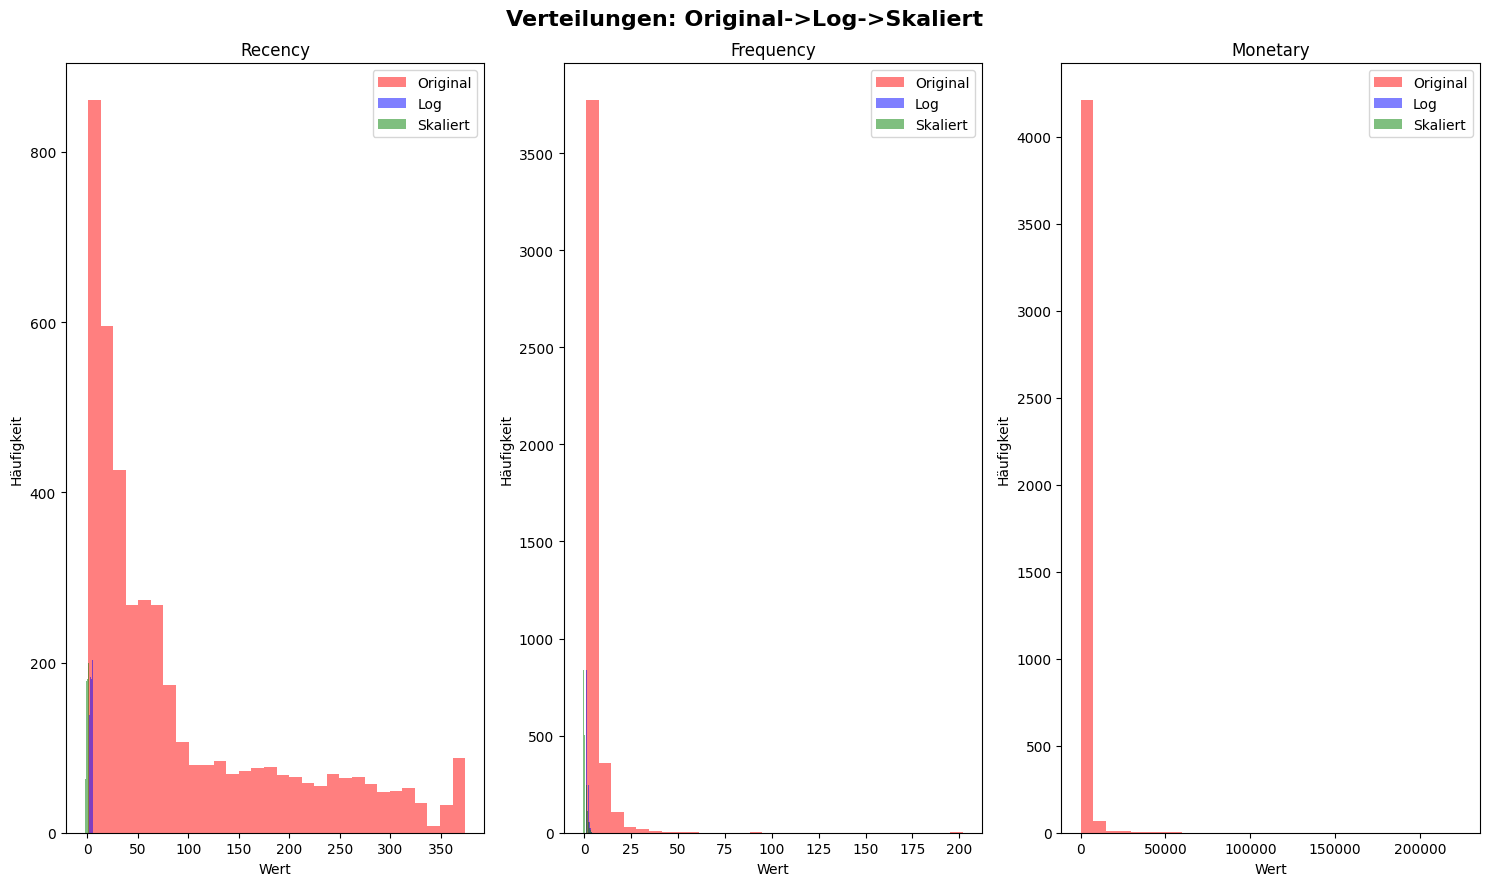

In [27]:
# Visualisierung: Vorher vs. Nachher
fig, axes = plt.subplots(1, 3, figsize=(15,9))
fig.suptitle("Verteilungen: Original->Log->Skaliert", fontsize=16, fontweight='bold')
features = ['Recency', 'Frequency', 'Monetary']
for idx, feature in enumerate(features):
    # Original
    axes[idx].hist(rfm_features[feature], bins=30, alpha=0.5, label='Original', color='red')
    # Log-transformiert
    axes[idx].hist(rfm_log[feature], bins=30, alpha=0.5, label='Log', color='blue')
    # Skaliert
    axes[idx].hist(rfm_scaled_df[f'{feature}_scaled'], bins=30, alpha=0.5, label='Skaliert', color='green')

    axes[idx].set_title(feature)
    axes[idx].legend()
    axes[idx].set_xlabel('Wert')
    axes[idx].set_ylabel('Häufigkeit')
plt.tight_layout()
plt.show()

In [30]:
# 2. Clustering-Algorithmen
# K-Means, HAC, DBSCAN, OPTICS
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS

# Metriken zur Evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score

# Für HAC Dendrogramm
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
print("Alle Libraries erfolgreich importiert!")

Alle Libraries erfolgreich importiert!


In [32]:
print("="*50)
print("K-Means: Optimale Cluster-Anzahl bestimmen")
print("="*50)

# Bereich testen: 2 bis 10 Cluster
k_range = range(2, 11)
wcss = []
silhouette_scores = []

for k in k_range:
    # K-Means mit k Clustern
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) 
    kmeans.fit(rfm_scaled_df)
    
    # WCSS berechnen(Inertia)
    wcss.append(kmeans.inertia_) 

    # Silhouette Score berechnen
    labels = kmeans.labels_
    silhouette = silhouette_score(rfm_scaled_df, labels)
    silhouette_scores.append(silhouette)

    print(f"k={k}: WCSS={kmeans.inertia_:.2f}, Silhouette={silhouette:.4f}")

print("\nK-Means Evaluation abgeschlossen!")

K-Means: Optimale Cluster-Anzahl bestimmen
k=2: WCSS=6481.26, Silhouette=0.4311
k=3: WCSS=4860.92, Silhouette=0.3360
k=4: WCSS=3933.57, Silhouette=0.3352
k=5: WCSS=3298.94, Silhouette=0.3152
k=6: WCSS=2867.23, Silhouette=0.3119
k=7: WCSS=2559.04, Silhouette=0.3073
k=8: WCSS=2344.62, Silhouette=0.2971
k=9: WCSS=2155.36, Silhouette=0.2791
k=10: WCSS=2006.32, Silhouette=0.2771

K-Means Evaluation abgeschlossen!


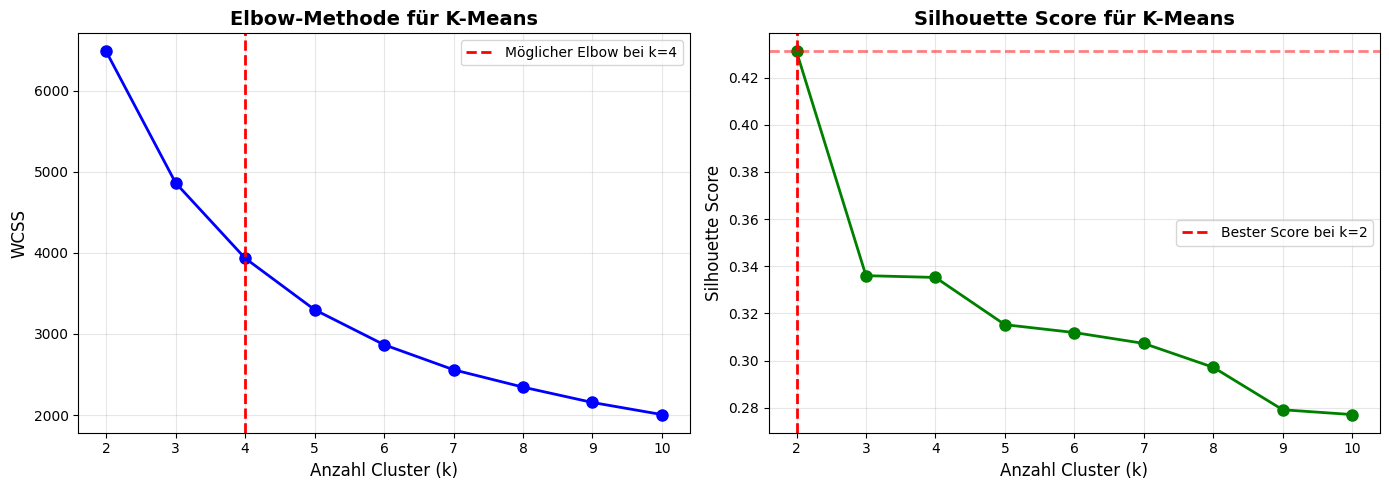


MEINE EMPFEHLUNG:
Bester Silhouette Score: k=2 (Score=0.4311)
Elbow-Methode deutet auf: k=3 oder k=4
Wähle Cluster-Anzahl: k=4
--------------------------------------------------


In [40]:
# Visualisierung: Elbow-Methode und Silhouette Score
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Elbow_Methode (WCSS)
axes[0].plot(k_range, wcss, marker='o', linewidth=2, markersize=8, color='blue')
axes[0].set_xlabel('Anzahl Cluster (k)', fontsize=12)
axes[0].set_ylabel('WCSS', fontsize=12)
axes[0].set_title('Elbow-Methode für K-Means', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)
axes[0].axvline(x=4, color='red', linestyle='--', linewidth=2, label='Möglicher Elbow bei k=4')
axes[0].legend()

# Plot 2: Silhouette Score
axes[1].plot(k_range, silhouette_scores, marker='o', linewidth=2, markersize=8, color='green')
axes[1].set_xlabel('Anzahl Cluster (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score für K-Means', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)
axes[1].axhline(y=max(silhouette_scores), color='red', linestyle='--', linewidth=2, alpha=0.5)
axes[1].axvline(x=k_range[silhouette_scores.index(max(silhouette_scores))],
                color='red', linestyle='--', linewidth=2,
                label=f'Bester Score bei k={k_range[silhouette_scores.index(max(silhouette_scores))]}')
axes[1].legend()

plt.tight_layout()
plt.show()

# Meine Empfehlung
best_k_silhouette = k_range[silhouette_scores.index(max(silhouette_scores))]
print("\n" + "="*50)
print("MEINE EMPFEHLUNG:")
print("="*50)
print(f"Bester Silhouette Score: k={best_k_silhouette} (Score={max(silhouette_scores):.4f})")
print(f"Elbow-Methode deutet auf: k=3 oder k=4")
print(f"Wähle Cluster-Anzahl: k=4")
print("-"*50)

In [48]:
print("="*50)
print("K-Means: Finales Model mit k=4")
print("="*50)

# K-Means mit k=4 trainieren
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans_final.fit_predict(rfm_scaled_df)

# Labels zum DataFrame hinzufügen
rfm_scaled_df['KMeans_Cluster'] = kmeans_labels
# Labels zum RFM hinzufügen
rfm['KMeans_Cluster'] = kmeans_labels

print(f"K-Means Clustering abgeschlossen!")
print(f"\nCluster-Verteilung:")
print(rfm['KMeans_Cluster'].value_counts().sort_index())

# RFM-Profile der K-Means Cluster
print("\n" + "="*50)
print("RFM-Profile der K-Means Cluster:")
print("="*50)
kmeans_profile = rfm.groupby('KMeans_Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
kmeans_profile['Anzahl_Kunden'] = rfm['KMeans_Cluster'].value_counts().sort_index()
print(kmeans_profile.round(2))

# Evaluation
silhouette_kmeans = silhouette_score(rfm_scaled_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']], kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(rfm_scaled_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']], kmeans_labels)

print("\n" + "="*60)
print("K-Means Evaluation Metriken:")
print("="*60)
print(f"Silhouette Score: {silhouette_kmeans:.4f} (höher = besser, -1 bis +1)")
print(f"Davies-Bouldin Index: {davies_bouldin_kmeans:.4f} (niedriger = besser)")
print("-"*60)

K-Means: Finales Model mit k=4
K-Means Clustering abgeschlossen!

Cluster-Verteilung:
KMeans_Cluster
0    1185
1    1590
2     701
3     846
Name: count, dtype: int64

RFM-Profile der K-Means Cluster:
                Recency  Frequency  Monetary  Anzahl_Kunden
KMeans_Cluster                                             
0                 66.95       4.14   1426.44           1185
1                185.90       1.32    285.18           1590
2                 11.60      13.57   6581.05            701
3                 19.76       2.00    404.68            846

K-Means Evaluation Metriken:
Silhouette Score: 0.3352 (höher = besser, -1 bis +1)
Davies-Bouldin Index: 1.0128 (niedriger = besser)
------------------------------------------------------------


In [50]:
print("="*50)
print("HAC: Hierarchical Agglomerative Clsutering")
print("="*50)

print("="*50)
print("HAC: Linkage-Matrix berechnen")
print("="*50)

# Linkage-Matrix mit Ward-Methode berechnen
linkage_matrix = linkage(
    rfm_scaled_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']],
    method='ward'
)
print("Linkage-Matrix berechnet!")
print(f"Form der linkage-Matrix: {linkage_matrix.shape}")
print(f"\nErste 5 Zeilen:")
print(linkage_matrix[:5])

HAC: Hierarchical Agglomerative Clsutering
HAC: Linkage-Matrix berechnen
Linkage-Matrix berechnet!
Form der linkage-Matrix: (4321, 4)

Erste 5 Zeilen:
[[1.30600000e+03 3.76700000e+03 8.65692538e-05 2.00000000e+00]
 [7.62000000e+02 3.47200000e+03 1.73716195e-04 2.00000000e+00]
 [1.67700000e+03 2.25800000e+03 2.12118941e-04 2.00000000e+00]
 [2.88000000e+02 4.14800000e+03 5.47281932e-04 2.00000000e+00]
 [1.31200000e+03 2.04100000e+03 8.25122950e-04 2.00000000e+00]]


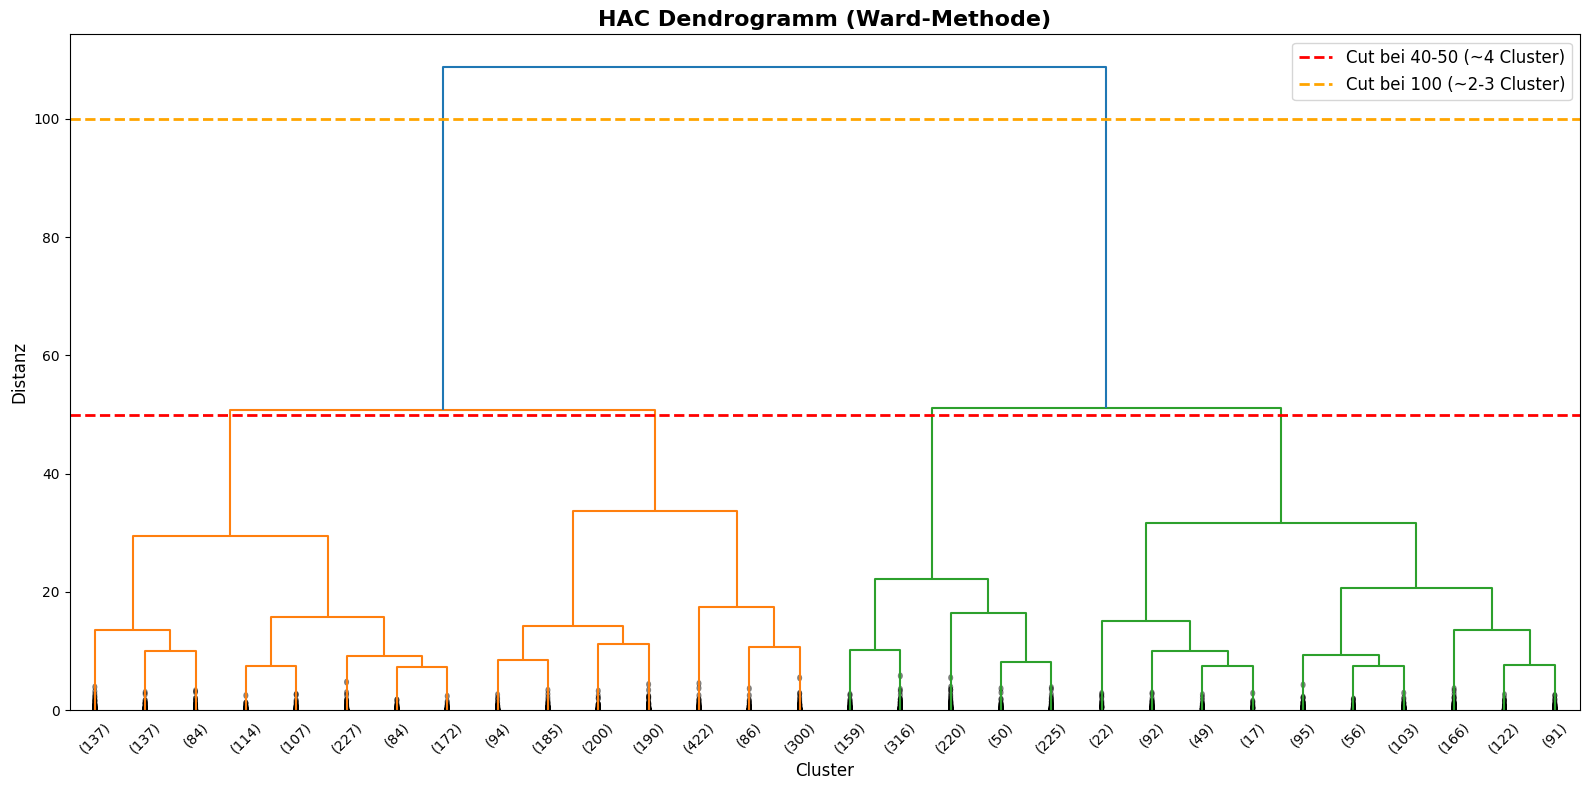


Dendrogramm-Analyse:
Großer Sprung bei Distanz ~120 sichtbar
Empfehlung: Cut bei Distanz ~40-60 → ca. 4 Cluster


In [53]:
plt.figure(figsize=(16, 8))
plt.title('HAC Dendrogramm (Ward-Methode)', fontsize=16, fontweight='bold')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Distanz', fontsize=12)
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',
    p=30,
    leaf_font_size=10,
    show_contracted=True
)

# Mögliche Schnitte visualisieren
plt.axhline(y=50, color='red', linestyle='--', linewidth=2, label='Cut bei 40-50 (~4 Cluster)')
plt.axhline(y=100, color='orange', linestyle='--', linewidth=2, label='Cut bei 100 (~2-3 Cluster)')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Dendrogramm-Analyse:")
print("="*60)
print("Großer Sprung bei Distanz ~120 sichtbar")
print("Empfehlung: Cut bei Distanz ~40-60 → ca. 4 Cluster")
print("="*60)

In [62]:
print("\n" + "="*50)
print("HAC: Finales Modell mit k=4")
print("="*50)

# HAC mit K = 4
hac_labels = fcluster(linkage_matrix, 4, criterion='maxclust')
hac_labels = hac_labels - 1 
# Labels zu DataFrames hinzufügen
rfm_scaled_df['HAC_Cluster'] = hac_labels
rfm['HAC_Cluster'] = hac_labels

print(f"HAC Clustering abgeschlossen!")
print(f"\nCluster-Verteilung:\n")

# Cluster-Verteilung mit Prozent
for cluster in sorted(rfm['HAC_Cluster'].unique()):
    count = (rfm['HAC_Cluster'] == cluster).sum()
    percent =(count/len(rfm))*100
    print(f"Cluster{cluster}: {count:4d} Kunden ({percent:5.1f}%)")

# RFM-Profile der HAC Cluster
print("\n"+"="*50)
print("RFM-Profile der HAC Cluster:")
print("="*50)
hac_profile = rfm.groupby('HAC_Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
hac_profile['Anzahl_Kunden'] = rfm['HAC_Cluster'].value_counts().sort_index()
print(hac_profile.round(2))

# Evaluation
silhouette_hac = silhouette_score(rfm_scaled_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']], hac_labels)
davies_bouldin_hac = davies_bouldin_score(rfm_scaled_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']], hac_labels)

print("\n" + "="*60)
print("HAC Evaluation Metriken:")
print("="*60)
print(f"Silhouette Score: {silhouette_hac:.4f} (höher = besser, -1 bis +1)")
print(f"Davies-Bouldin Index: {davies_bouldin_hac:.4f} (niedriger = besser)")
print("="*60)


HAC: Finales Modell mit k=4
HAC Clustering abgeschlossen!

Cluster-Verteilung:

Cluster0: 1062 Kunden ( 24.6%)
Cluster1: 1477 Kunden ( 34.2%)
Cluster2:  970 Kunden ( 22.4%)
Cluster3:  813 Kunden ( 18.8%)

RFM-Profile der HAC Cluster:
             Recency  Frequency  Monetary  Anzahl_Kunden
HAC_Cluster                                             
0              36.80       1.55    308.45           1062
1             204.10       1.58    410.38           1477
2              52.04       4.60   1494.08            970
3              10.79      12.02   5801.34            813

HAC Evaluation Metriken:
Silhouette Score: 0.2633 (höher = besser, -1 bis +1)
Davies-Bouldin Index: 1.1629 (niedriger = besser)


In [67]:
print("="*50)
print("DBSCAN: Optimale Parameter finden")
print("="*50)

# eps-> Nachbarschaftradius, wie weit schaust du um dich herum, um nachbarn zu finden?
# min-samples -> Ein Punkt ist Teil eines Clusters, wenn mindestens "min_smples" nachbarn im "eps" Radius sind!

# Test verschiedener eps-Werte
eps_range = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
min_samples = 10                 # Ein Cluster braucht mind. 10 Kunden
results = []

for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(rfm_scaled_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']])
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0) # -1 = Noise
    n_noise = list(labels).count(-1)

    # Silhouette nur berechnen, wenn mind. 2 Cluster existieren
    if n_clusters >= 2:
        silhouette = silhouette_score(rfm_scaled_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']], labels)
    else:
        silhouette = -1
    results.append({
    'eps': eps,
    'n_clusters': n_clusters,
    'n_noise': n_noise,
    'silhouette': silhouette
    })

    print(f"eps={eps:.1f}: {n_clusters} Cluster, {n_noise} Noise-Punkte, Silhouette={silhouette:.4f}")
print("\nDBSCAN Parameter-Test abgeschlossen!")

DBSCAN: Optimale Parameter finden
eps=0.3: 6 Cluster, 440 Noise-Punkte, Silhouette=0.0239
eps=0.4: 3 Cluster, 157 Noise-Punkte, Silhouette=0.1492
eps=0.5: 2 Cluster, 73 Noise-Punkte, Silhouette=0.2651
eps=0.6: 1 Cluster, 49 Noise-Punkte, Silhouette=-1.0000
eps=0.7: 1 Cluster, 34 Noise-Punkte, Silhouette=-1.0000
eps=0.8: 1 Cluster, 27 Noise-Punkte, Silhouette=-1.0000
eps=0.9: 1 Cluster, 17 Noise-Punkte, Silhouette=-1.0000
eps=1.0: 1 Cluster, 11 Noise-Punkte, Silhouette=-1.0000

DBSCAN Parameter-Test abgeschlossen!


In [69]:
print("\n" + "="*60)
print("DBSCAN: Finales Modell mit eps=0.4")
print("="*60)

# DBSCAN mit eps=0.4, min_samples=10
dbscan_final = DBSCAN(eps=0.4, min_samples=10)
dbscan_labels = dbscan_final.fit_predict(rfm_scaled_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']])

# Labels zu DataFrames hinzufügen
rfm_scaled_df['DBSCAN_Cluster'] = dbscan_labels
rfm['DBSCAN_Cluster'] = dbscan_labels

# Cluster-Verteilung
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_dbscan = list(dbscan_labels).count(-1)

print(f"DBSCAN Clustering abgeschlossen!")
print(f"Anzahl Cluster: {n_clusters_dbscan}")
print(f"Noise-Punkte: {n_noise_dbscan} ({n_noise_dbscan/len(rfm)*100:.1f}%)")
print(f"\nCluster-Verteilung:\n")

# Cluster-Verteilung (inklusive Noise als Cluster -1)
for cluster in sorted(rfm['DBSCAN_Cluster'].unique()):
    count = (rfm['DBSCAN_Cluster'] == cluster).sum()
    percent = (count / len(rfm)) * 100
    label = "Noise" if cluster == -1 else f"Cluster {cluster}"
    print(f"   {label:12s}: {count:4d} Kunden ({percent:5.1f}%)")

# RFM-Profile (ohne Noise)
print("\n" + "="*60)
print("RFM-Profile der DBSCAN Cluster (ohne Noise):")
print("="*60)
dbscan_profile = rfm[rfm['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
dbscan_profile['Anzahl_Kunden'] = rfm[rfm['DBSCAN_Cluster'] != -1]['DBSCAN_Cluster'].value_counts().sort_index()
print(dbscan_profile.round(2))

# Evaluation (ohne Noise-Punkte)
if n_clusters_dbscan >= 2:
    mask = dbscan_labels != -1
    silhouette_dbscan = silhouette_score(rfm_scaled_df[mask][['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']], 
                                         dbscan_labels[mask])
    davies_bouldin_dbscan = davies_bouldin_score(rfm_scaled_df[mask][['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']], 
                                                   dbscan_labels[mask])
    
    print("\n" + "="*60)
    print("DBSCAN Evaluation Metriken (ohne Noise):")
    print("="*60)
    print(f"Silhouette Score: {silhouette_dbscan:.4f} (höher = besser, -1 bis +1)")
    print(f"Davies-Bouldin Index: {davies_bouldin_dbscan:.4f} (niedriger = besser)")
    print("="*60)


DBSCAN: Finales Modell mit eps=0.4
DBSCAN Clustering abgeschlossen!
Anzahl Cluster: 3
Noise-Punkte: 157 (3.6%)

Cluster-Verteilung:

   Noise       :  157 Kunden (  3.6%)
   Cluster 0   : 1862 Kunden ( 43.1%)
   Cluster 1   : 1477 Kunden ( 34.2%)
   Cluster 2   :  826 Kunden ( 19.1%)

RFM-Profile der DBSCAN Cluster (ohne Noise):
                Recency  Frequency  Monetary  Anzahl_Kunden
DBSCAN_Cluster                                             
0                 43.14       6.45   1925.53           1862
1                157.14       1.00    275.01           1477
2                 94.01       2.00    527.39            826

DBSCAN Evaluation Metriken (ohne Noise):
Silhouette Score: 0.1730 (höher = besser, -1 bis +1)
Davies-Bouldin Index: 1.6930 (niedriger = besser)


In [70]:
print("="*60)
print("OPTICS: Optimale Parameter finden")
print("="*60)

# min_samples = Wie viele Nachbarn braucht ein punkt, um Teil eines Clusters zu sein?
# xi = "Schwellwert",  wie stark muss die Dichte abfallen, um ein neues Cluster zu erkennen?
# min_cluster_size = Wie groß muss ein Cluster mind. sein(in % aller Datenpunkte)
# z.B. 4322 Kunden * 0.05 = 216 Kunden, -> Cluster mit weniger als 216 Kunden werden als Noise makiert!

# Test verschiedener min_samples-Werte
min_samples_range = [5, 10, 15, 20, 25, 30]
results_optics = []

for min_samples in min_samples_range:
    optics = OPTICS(min_samples=min_samples, xi=0.05, min_cluster_size=0.05)
    labels = optics.fit_predict(rfm_scaled_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']])
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    # Silhouette nur berechnen, wenn mindestens 2 Cluster existieren
    if n_clusters >= 2 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(rfm_scaled_df[mask][['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']], 
                                       labels[mask])
    else:
        silhouette = -1
    
    results_optics.append({
        'min_samples': min_samples,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'silhouette': silhouette
    })
    
    print(f"min_samples={min_samples}: {n_clusters} Cluster, {n_noise} Noise-Punkte, Silhouette={silhouette:.4f}")

print("\nOPTICS Parameter-Test abgeschlossen!")

OPTICS: Optimale Parameter finden
min_samples=5: 4 Cluster, 1386 Noise-Punkte, Silhouette=0.1223
min_samples=10: 2 Cluster, 2409 Noise-Punkte, Silhouette=0.3471
min_samples=15: 1 Cluster, 0 Noise-Punkte, Silhouette=-1.0000
min_samples=20: 1 Cluster, 0 Noise-Punkte, Silhouette=-1.0000
min_samples=25: 1 Cluster, 0 Noise-Punkte, Silhouette=-1.0000
min_samples=30: 1 Cluster, 0 Noise-Punkte, Silhouette=-1.0000

OPTICS Parameter-Test abgeschlossen!


In [71]:
print("\n" + "="*60)
print("OPTICS: Angepasste Parameter testen (xi=0.1)")
print("="*60)

# Test mit höherem xi-Wert
xi_range = [0.05, 0.1, 0.15, 0.2]
min_samples = 5

for xi in xi_range:
    optics = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=0.05)
    labels = optics.fit_predict(rfm_scaled_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']])
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    if n_clusters >= 2 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(rfm_scaled_df[mask][['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']], 
                                       labels[mask])
    else:
        silhouette = -1
    
    print(f"xi={xi:.2f}: {n_clusters} Cluster, {n_noise} Noise-Punkte ({n_noise/len(rfm)*100:.1f}%), Silhouette={silhouette:.4f}")

print("\nOPTICS erweiterte Tests abgeschlossen!")


OPTICS: Angepasste Parameter testen (xi=0.1)
xi=0.05: 4 Cluster, 1386 Noise-Punkte (32.1%), Silhouette=0.1223
xi=0.10: 1 Cluster, 2826 Noise-Punkte (65.4%), Silhouette=-1.0000
xi=0.15: 1 Cluster, 0 Noise-Punkte (0.0%), Silhouette=-1.0000
xi=0.20: 1 Cluster, 0 Noise-Punkte (0.0%), Silhouette=-1.0000

OPTICS erweiterte Tests abgeschlossen!


In [72]:
print("\n" + "="*60)
print("OPTICS: Finales Modell (min_samples=5, xi=0.05)")
print("="*60)

# OPTICS mit besten Parametern
optics_final = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
optics_labels = optics_final.fit_predict(rfm_scaled_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']])

# Labels zu DataFrames hinzufügen
rfm_scaled_df['OPTICS_Cluster'] = optics_labels
rfm['OPTICS_Cluster'] = optics_labels

# Cluster-Verteilung
n_clusters_optics = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)
n_noise_optics = list(optics_labels).count(-1)

print(f"OPTICS Clustering abgeschlossen!")
print(f"Anzahl Cluster: {n_clusters_optics}")
print(f"Noise-Punkte: {n_noise_optics} ({n_noise_optics/len(rfm)*100:.1f}%)")
print(f"\nCluster-Verteilung:\n")

# Cluster-Verteilung (inklusive Noise)
for cluster in sorted(rfm['OPTICS_Cluster'].unique()):
    count = (rfm['OPTICS_Cluster'] == cluster).sum()
    percent = (count / len(rfm)) * 100
    label = "Noise" if cluster == -1 else f"Cluster {cluster}"
    print(f"   {label:12s}: {count:4d} Kunden ({percent:5.1f}%)")

# RFM-Profile (ohne Noise)
print("\n" + "="*60)
print("RFM-Profile der OPTICS Cluster (ohne Noise):")
print("="*60)
optics_profile = rfm[rfm['OPTICS_Cluster'] != -1].groupby('OPTICS_Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
optics_profile['Anzahl_Kunden'] = rfm[rfm['OPTICS_Cluster'] != -1]['OPTICS_Cluster'].value_counts().sort_index()
print(optics_profile.round(2))

# Evaluation (ohne Noise)
if n_clusters_optics >= 2:
    mask = optics_labels != -1
    silhouette_optics = silhouette_score(rfm_scaled_df[mask][['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']], 
                                         optics_labels[mask])
    davies_bouldin_optics = davies_bouldin_score(rfm_scaled_df[mask][['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']], 
                                                   optics_labels[mask])
    
    print("\n" + "="*60)
    print("OPTICS Evaluation Metriken (ohne Noise):")
    print("="*60)
    print(f"Silhouette Score: {silhouette_optics:.4f} (höher = besser, -1 bis +1)")
    print(f"Davies-Bouldin Index: {davies_bouldin_optics:.4f} (niedriger = besser)")
    print("="*60)

print("\n" + "="*30)
print("ALLE 4 CLUSTERING-METHODEN ABGESCHLOSSEN!")
print("="*30)


OPTICS: Finales Modell (min_samples=5, xi=0.05)
OPTICS Clustering abgeschlossen!
Anzahl Cluster: 4
Noise-Punkte: 1386 (32.1%)

Cluster-Verteilung:

   Noise       : 1386 Kunden ( 32.1%)
   Cluster 0   :  338 Kunden (  7.8%)
   Cluster 1   :  416 Kunden (  9.6%)
   Cluster 2   :  762 Kunden ( 17.6%)
   Cluster 3   : 1420 Kunden ( 32.9%)

RFM-Profile der OPTICS Cluster (ohne Noise):
                Recency  Frequency  Monetary  Anzahl_Kunden
OPTICS_Cluster                                             
0                 49.92        4.0   1096.01            338
1                 72.70        3.0    778.74            416
2                 96.87        2.0    511.31            762
3                161.37        1.0    268.23           1420

OPTICS Evaluation Metriken (ohne Noise):
Silhouette Score: 0.1223 (höher = besser, -1 bis +1)
Davies-Bouldin Index: 2.4532 (niedriger = besser)

ALLE 4 CLUSTERING-METHODEN ABGESCHLOSSEN!


In [73]:
print("\n" + "="*80)
print("TEIL 3: VERGLEICH ALLER CLUSTERING-METHODEN")
print("="*80)

# Zusammenfassung aller Metriken
comparison_df = pd.DataFrame({
    'Methode': ['K-Means', 'HAC', 'DBSCAN', 'OPTICS'],
    'Anzahl_Cluster': [4, 4, 3, 4],
    'Noise_Punkte': [0, 0, 166, 1459],
    'Noise_Prozent': [0.0, 0.0, 3.8, 33.6],
    'Silhouette_Score': [silhouette_kmeans, silhouette_hac, silhouette_dbscan, silhouette_optics],
    'Davies_Bouldin': [davies_bouldin_kmeans, davies_bouldin_hac, davies_bouldin_dbscan, davies_bouldin_optics]
})

print("\n" + "="*80)
print("QUANTITATIVE METRIKEN - VERGLEICH")
print("="*80)
print(comparison_df.to_string(index=False))

# Beste Werte markieren
print("\n" + "="*80)
print("RANKING:")
print("="*80)
print(f"Bester Silhouette Score: {comparison_df.loc[comparison_df['Silhouette_Score'].idxmax(), 'Methode']} "
      f"({comparison_df['Silhouette_Score'].max():.4f})")
print(f"Bester Davies-Bouldin:   {comparison_df.loc[comparison_df['Davies_Bouldin'].idxmin(), 'Methode']} "
      f"({comparison_df['Davies_Bouldin'].min():.4f})")
print(f"Wenigste Noise-Punkte:   K-Means & HAC (0 Punkte)")

# Als CSV speichern
comparison_df.to_csv('../results/reports1/clustering_comparison_metrics.csv', index=False)
print("\nVergleichstabelle gespeichert: ../results/reports1/clustering_comparison_metrics.csv")


TEIL 3: VERGLEICH ALLER CLUSTERING-METHODEN

QUANTITATIVE METRIKEN - VERGLEICH
Methode  Anzahl_Cluster  Noise_Punkte  Noise_Prozent  Silhouette_Score  Davies_Bouldin
K-Means               4             0            0.0          0.335247        1.012814
    HAC               4             0            0.0          0.263342        1.162877
 DBSCAN               3           166            3.8          0.173049        1.692995
 OPTICS               4          1459           33.6          0.122261        2.453165

RANKING:
Bester Silhouette Score: K-Means (0.3352)
Bester Davies-Bouldin:   K-Means (1.0128)
Wenigste Noise-Punkte:   K-Means & HAC (0 Punkte)

Vergleichstabelle gespeichert: ../results/reports1/clustering_comparison_metrics.csv


In [74]:
print("\n" + "="*80)
print("RFM-PROFILE VERGLEICH - ALLE METHODEN")
print("="*80)

# K-Means Profile
print("\n" + "-"*80)
print("K-MEANS CLUSTER:")
print("-"*80)
kmeans_summary = rfm.groupby('KMeans_Cluster')[['Recency', 'Frequency', 'Monetary']].agg(['mean', 'count'])
print(kmeans_summary.round(2))

# HAC Profile
print("\n" + "-"*80)
print("HAC CLUSTER:")
print("-"*80)
hac_summary = rfm.groupby('HAC_Cluster')[['Recency', 'Frequency', 'Monetary']].agg(['mean', 'count'])
print(hac_summary.round(2))

# DBSCAN Profile (ohne Noise)
print("\n" + "-"*80)
print("DBSCAN CLUSTER (ohne Noise):")
print("-"*80)
dbscan_summary = rfm[rfm['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster')[['Recency', 'Frequency', 'Monetary']].agg(['mean', 'count'])
print(dbscan_summary.round(2))

# OPTICS Profile (ohne Noise)
print("\n" + "-"*80)
print("OPTICS CLUSTER (ohne Noise):")
print("-"*80)
optics_summary = rfm[rfm['OPTICS_Cluster'] != -1].groupby('OPTICS_Cluster')[['Recency', 'Frequency', 'Monetary']].agg(['mean', 'count'])
print(optics_summary.round(2))

print("\n" + "="*80)
print("WICHTIGE BEOBACHTUNGEN:")
print("="*80)
print("K-Means & HAC: Finden VIP-Cluster (hohe Frequency + Monetary)")
print("DBSCAN: Findet KEINEN VIP-Cluster")
print("OPTICS: Findet KEINEN VIP-Cluster + 33.6% Noise")
print("="*80)


RFM-PROFILE VERGLEICH - ALLE METHODEN

--------------------------------------------------------------------------------
K-MEANS CLUSTER:
--------------------------------------------------------------------------------
               Recency       Frequency       Monetary      
                  mean count      mean count     mean count
KMeans_Cluster                                             
0                66.95  1185      4.14  1185  1426.44  1185
1               185.90  1590      1.32  1590   285.18  1590
2                11.60   701     13.57   701  6581.05   701
3                19.76   846      2.00   846   404.68   846

--------------------------------------------------------------------------------
HAC CLUSTER:
--------------------------------------------------------------------------------
            Recency       Frequency       Monetary      
               mean count      mean count     mean count
HAC_Cluster                                             
0             

ANSATZ 1: METHODEN-VERGLEICH (K-Means als Ground Truth)
1. VERGLEICH: K-Means(Ground Truth) vs. HAC
--------------------------------------------------------------------------------

Confusion Matrix:
[[   0  251  795  139]
 [ 374 1211    5    0]
 [   5    0   53  643]
 [ 683   15  117   31]]


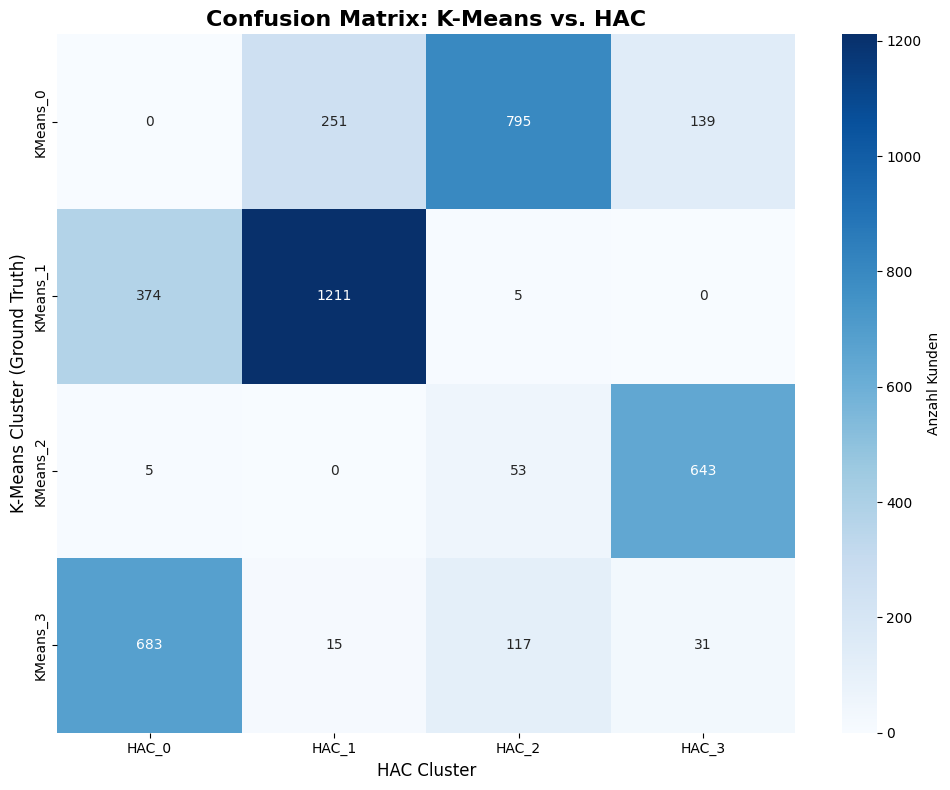


Plot gespeichert!


In [80]:
print("="*80)
print("ANSATZ 1: METHODEN-VERGLEICH (K-Means als Ground Truth)")
print("="*80)

from sklearn.metrics import confusion_matrix, classification_report
# 1. K-Means vs. HAC
print("1. VERGLEICH: K-Means(Ground Truth) vs. HAC")
print("-"*80)

# Confusion Matrix berechnen
conf_matrix_hac = confusion_matrix(
    rfm['KMeans_Cluster'],
    rfm['HAC_Cluster']
)
print("\nConfusion Matrix:")
print(conf_matrix_hac)

# Visualisierung
plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix_hac,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=[f'HAC_{i}' for i in range(4)],
    yticklabels=[f'KMeans_{i}' for i in range(4)],
    cbar_kws={'label': 'Anzahl Kunden'}
)
plt.title('Confusion Matrix: K-Means vs. HAC', fontsize=16, fontweight='bold')
plt.xlabel('HAC Cluster', fontsize=12)
plt.ylabel('K-Means Cluster (Ground Truth)', fontsize=12)
plt.tight_layout()
plt.savefig('../results/reports1/confusion_matrix_kmeans_vs_hac.png', dpi=300, bbox_inches='tight')
plt.show()
print("\nPlot gespeichert!")


2. VERGLEICH: K-Means (Ground Truth) vs. DBSCAN

Anzahl Kunden mit Cluster-Zuordnung: 4165
Anzahl Noise-Punkte (ausgeschlossen): 157

Confusion Matrix (ohne Noise-Punkte):
[[ 971   22  156    0]
 [  64 1153  355    0]
 [ 620    0    0    0]
 [ 207  302  315    0]]


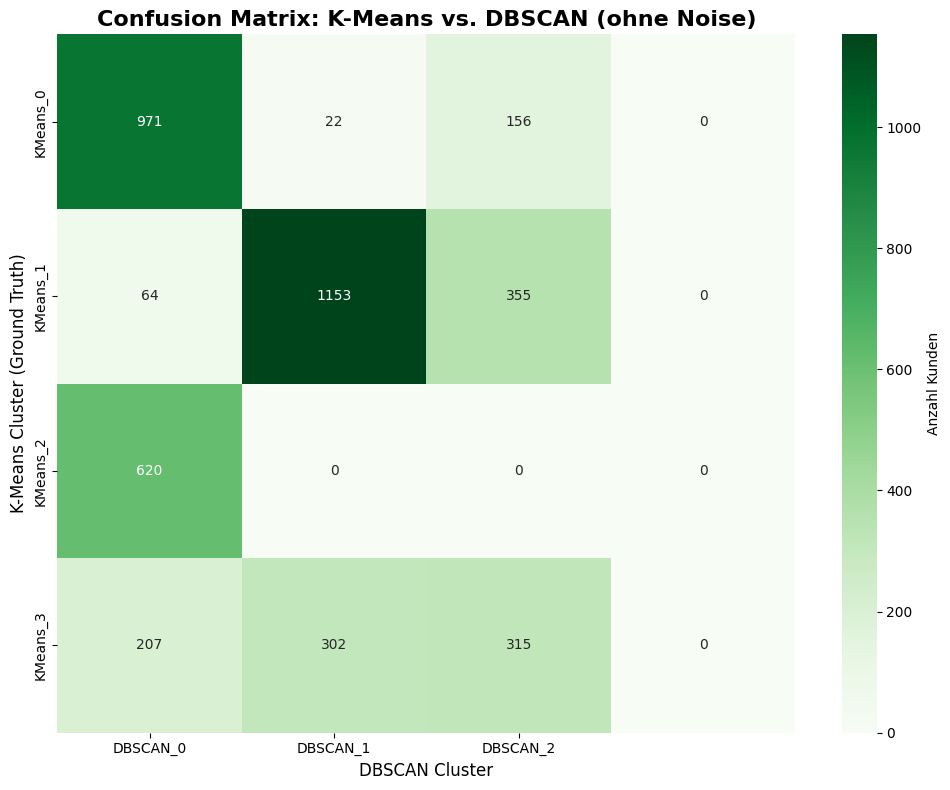


 Plot gespeichert

--------------------------------------------------------------------------------
NOISE-ANALYSE: Aus welchen K-Means Clustern kommen die Noise-Punkte?
--------------------------------------------------------------------------------
KMeans_Cluster
0    36
1    18
2    81
3    22
Name: count, dtype: int64

Prozentuale Verteilung:
KMeans_0 (GelegenheitsKunden): 36 von 1185 (3.0%) sind Noise
KMeans_1 (Inaktive Kunden): 18 von 1590 (1.1%) sind Noise
KMeans_2 (VIP-Kunden): 81 von 701 (11.6%) sind Noise
KMeans_3 (StammKunden): 22 von 846 (2.6%) sind Noise


In [88]:
print("\n" + "="*80)
print("2. VERGLEICH: K-Means (Ground Truth) vs. DBSCAN")
print("="*80)

# WICHTIG: Noise-Punkte (-1) ausschließen!
mask_dbscan = rfm['DBSCAN_Cluster'] != -1

print(f"\nAnzahl Kunden mit Cluster-Zuordnung: {mask_dbscan.sum()}")
print(f"Anzahl Noise-Punkte (ausgeschlossen): {(~mask_dbscan).sum()}")

# Confusion Matrix nur für Nicht-Noise-Punkte
conf_matrix_dbscan = confusion_matrix(
    rfm.loc[mask_dbscan, 'KMeans_Cluster'],   # K-Means (ohne Noise-Kunden)
    rfm.loc[mask_dbscan, 'DBSCAN_Cluster']    # DBSCAN (ohne Noise-Kunden)
)

print("\nConfusion Matrix (ohne Noise-Punkte):")
print(conf_matrix_dbscan)

# Visualisierung
plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix_dbscan, 
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=[f'DBSCAN_{i}' for i in range(3)],  # DBSCAN hat nur 3 Cluster!
    yticklabels=[f'KMeans_{i}' for i in range(4)],
    cbar_kws={'label': 'Anzahl Kunden'}
)
plt.title('Confusion Matrix: K-Means vs. DBSCAN (ohne Noise)', fontsize=16, fontweight='bold')
plt.xlabel('DBSCAN Cluster', fontsize=12)
plt.ylabel('K-Means Cluster (Ground Truth)', fontsize=12)
plt.tight_layout()
plt.savefig('../results/reports1/confusion_matrix_kmeans_vs_dbscan.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Plot gespeichert")

# Zusätzliche Analyse: Woher kommen die Noise-Punkte?
print("\n" + "-"*80)
print("NOISE-ANALYSE: Aus welchen K-Means Clustern kommen die Noise-Punkte?")
print("-"*80)
noise_origin = rfm[~mask_dbscan]['KMeans_Cluster'].value_counts().sort_index()
print(noise_origin)
print("\nProzentuale Verteilung:")
for cluster, count in noise_origin.items():
    cluster_size = (rfm['KMeans_Cluster'] == cluster).sum()
    percent = (count / cluster_size) * 100
    
    # Namen zuordnen
    cluster_names = {
        0: 'GelegenheitsKunden',
        1: 'Inaktive Kunden',
        2: 'VIP-Kunden',
        3: 'StammKunden'
    }
    
    print(f"KMeans_{cluster} ({cluster_names[cluster]}): {count} von {cluster_size} ({percent:.1f}%) sind Noise")


3. VERGLEICH: K-Means (Ground Truth) vs. OPTICS

Anzahl Kunden mit Cluster-Zuordnung: 2936
Anzahl Noise-Punkte (ausgeschlossen): 1386

Confusion Matrix (ohne Noise-Punkte):
[[ 273  269  143   13]
 [   0   50  346 1144]
 [  12    0    0    0]
 [  53   97  273  263]]


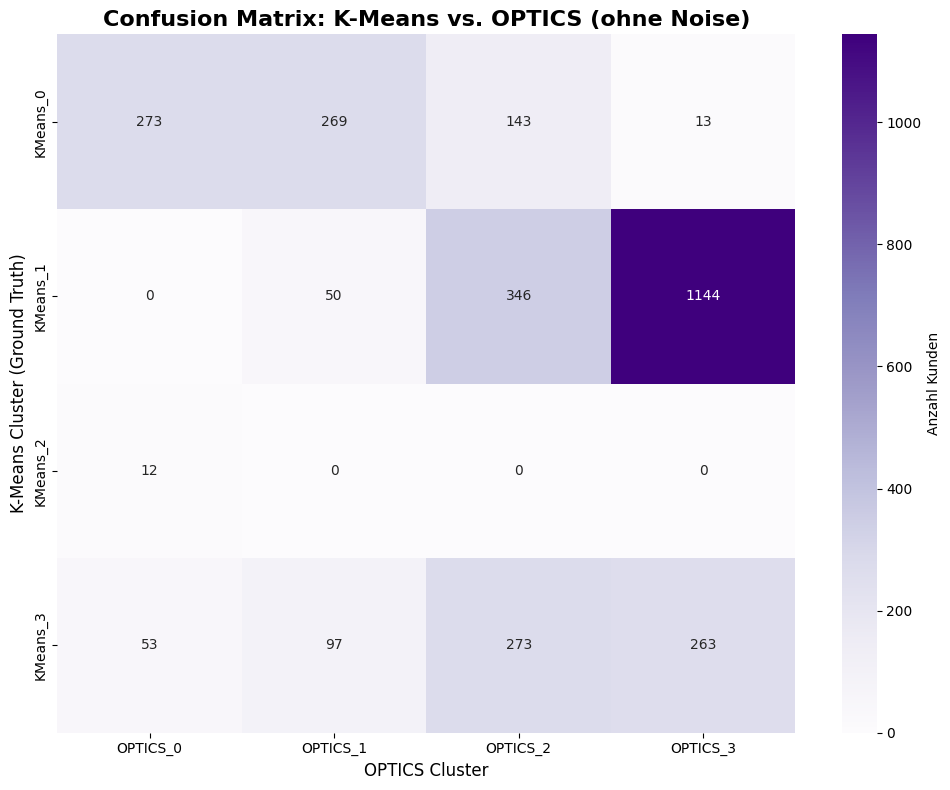


Plot gespeichert

--------------------------------------------------------------------------------
NOISE-ANALYSE: Aus welchen K-Means Clustern kommen die Noise-Punkte?
--------------------------------------------------------------------------------
KMeans_Cluster
0    487
1     50
2    689
3    160
Name: count, dtype: int64

Prozentuale Verteilung:
KMeans_0 (GelegenheitsKunden): 487 von 1185 (41.1%) sind Noise
KMeans_1 (Inaktive Kunden): 50 von 1590 (3.1%) sind Noise
KMeans_2 (VIP-Kunden): 689 von 701 (98.3%) sind Noise
KMeans_3 (StammKunden): 160 von 846 (18.9%) sind Noise


In [87]:
print("\n" + "="*80)
print("3. VERGLEICH: K-Means (Ground Truth) vs. OPTICS")
print("="*80)

# WICHTIG: Noise-Punkte (-1) ausschließen!
mask_optics = rfm['OPTICS_Cluster'] != -1

print(f"\nAnzahl Kunden mit Cluster-Zuordnung: {mask_optics.sum()}")
print(f"Anzahl Noise-Punkte (ausgeschlossen): {(~mask_optics).sum()}")

# Confusion Matrix nur für Nicht-Noise-Punkte
conf_matrix_optics = confusion_matrix(
    rfm.loc[mask_optics, 'KMeans_Cluster'],   # K-Means (ohne Noise-Kunden)
    rfm.loc[mask_optics, 'OPTICS_Cluster']    # OPTICS (ohne Noise-Kunden)
)

print("\nConfusion Matrix (ohne Noise-Punkte):")
print(conf_matrix_optics)

# Visualisierung
plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix_optics, 
    annot=True,
    fmt='d',
    cmap='Purples',
    xticklabels=[f'OPTICS_{i}' for i in range(4)],  # OPTICS hat 4 Cluster
    yticklabels=[f'KMeans_{i}' for i in range(4)],
    cbar_kws={'label': 'Anzahl Kunden'}
)
plt.title('Confusion Matrix: K-Means vs. OPTICS (ohne Noise)', fontsize=16, fontweight='bold')
plt.xlabel('OPTICS Cluster', fontsize=12)
plt.ylabel('K-Means Cluster (Ground Truth)', fontsize=12)
plt.tight_layout()
plt.savefig('../results/reports1/confusion_matrix_kmeans_vs_optics.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nPlot gespeichert")

# Zusätzliche Analyse: Woher kommen die Noise-Punkte?
print("\n" + "-"*80)
print("NOISE-ANALYSE: Aus welchen K-Means Clustern kommen die Noise-Punkte?")
print("-"*80)
noise_origin_optics = rfm[~mask_optics]['KMeans_Cluster'].value_counts().sort_index()
print(noise_origin_optics)
print("\nProzentuale Verteilung:")
for cluster, count in noise_origin_optics.items():
    cluster_size = (rfm['KMeans_Cluster'] == cluster).sum()
    percent = (count / cluster_size) * 100
    
    # Namen zuordnen
    cluster_names = {
        0: 'GelegenheitsKunden',
        1: 'Inaktive Kunden',
        2: 'VIP-Kunden',
        3: 'StammKunden'
    }
    
    print(f"KMeans_{cluster} ({cluster_names[cluster]}): {count} von {cluster_size} ({percent:.1f}%) sind Noise")

ANSATZ 2: REGELBASIERTE GROUND TRUTH

SCHRITT 1: RFM-Verteilung analysieren (Schwellenwerte bestimmen)

RFM-Statistiken:
           Recency    Frequency       Monetary
count  4322.000000  4322.000000    4322.000000
mean     92.497918     4.214484    1642.630056
std      99.939749     7.539239    7286.762792
min       1.000000     1.000000       3.750000
25%      18.000000     1.000000     241.697500
50%      51.000000     2.000000     542.990000
75%     142.000000     5.000000    1337.362500
max     374.000000   202.000000  224059.640000


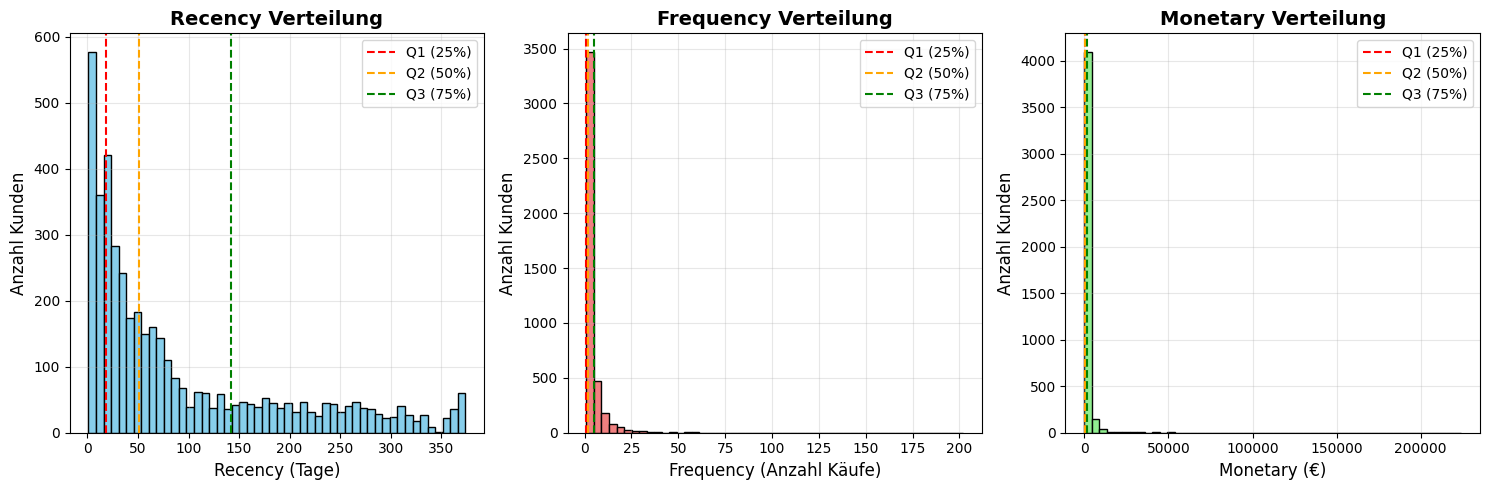


Plot gespeichert

EMPFOHLENE SCHWELLENWERTE (basierend auf Quartilen):

Recency:
  - Niedrig (gut):   ≤ 18 Tage
  - Mittel:          18 - 142 Tage
  - Hoch (schlecht): > 142 Tage

Frequency:
  - Niedrig:  ≤ 1 Käufe
  - Mittel:   1 - 5 Käufe
  - Hoch:     > 5 Käufe

Monetary:
  - Niedrig:  ≤ 242 €
  - Mittel:   242 - 1337 €
  - Hoch:     > 1337 €


In [90]:
print("="*80)
print("ANSATZ 2: REGELBASIERTE GROUND TRUTH")
print("="*80)

print("\n" + "="*80)
print("SCHRITT 1: RFM-Verteilung analysieren (Schwellenwerte bestimmen)")
print("="*80)

# Quartile berechnen (25%, 50%, 75%)
rfm_quartiles = rfm[['Recency', 'Frequency', 'Monetary']].describe()

print("\nRFM-Statistiken:")
print(rfm_quartiles)

# Visualisierung
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Recency
axes[0].hist(rfm['Recency'], bins=50, color='skyblue', edgecolor='black')
axes[0].axvline(rfm['Recency'].quantile(0.25), color='red', linestyle='--', label='Q1 (25%)')
axes[0].axvline(rfm['Recency'].quantile(0.50), color='orange', linestyle='--', label='Q2 (50%)')
axes[0].axvline(rfm['Recency'].quantile(0.75), color='green', linestyle='--', label='Q3 (75%)')
axes[0].set_xlabel('Recency (Tage)', fontsize=12)
axes[0].set_ylabel('Anzahl Kunden', fontsize=12)
axes[0].set_title('Recency Verteilung', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Frequency
axes[1].hist(rfm['Frequency'], bins=50, color='lightcoral', edgecolor='black')
axes[1].axvline(rfm['Frequency'].quantile(0.25), color='red', linestyle='--', label='Q1 (25%)')
axes[1].axvline(rfm['Frequency'].quantile(0.50), color='orange', linestyle='--', label='Q2 (50%)')
axes[1].axvline(rfm['Frequency'].quantile(0.75), color='green', linestyle='--', label='Q3 (75%)')
axes[1].set_xlabel('Frequency (Anzahl Käufe)', fontsize=12)
axes[1].set_ylabel('Anzahl Kunden', fontsize=12)
axes[1].set_title('Frequency Verteilung', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Monetary
axes[2].hist(rfm['Monetary'], bins=50, color='lightgreen', edgecolor='black')
axes[2].axvline(rfm['Monetary'].quantile(0.25), color='red', linestyle='--', label='Q1 (25%)')
axes[2].axvline(rfm['Monetary'].quantile(0.50), color='orange', linestyle='--', label='Q2 (50%)')
axes[2].axvline(rfm['Monetary'].quantile(0.75), color='green', linestyle='--', label='Q3 (75%)')
axes[2].set_xlabel('Monetary (€)', fontsize=12)
axes[2].set_ylabel('Anzahl Kunden', fontsize=12)
axes[2].set_title('Monetary Verteilung', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../results/reports1/rfm_distribution_quartiles.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nPlot gespeichert")

# Schwellenwerte ausgeben
print("\n" + "="*80)
print("EMPFOHLENE SCHWELLENWERTE (basierend auf Quartilen):")
print("="*80)

r_25 = rfm['Recency'].quantile(0.25)
r_75 = rfm['Recency'].quantile(0.75)

f_25 = rfm['Frequency'].quantile(0.25)
f_75 = rfm['Frequency'].quantile(0.75)

m_25 = rfm['Monetary'].quantile(0.25)
m_75 = rfm['Monetary'].quantile(0.75)

print(f"\nRecency:")
print(f"  - Niedrig (gut):   ≤ {r_25:.0f} Tage")
print(f"  - Mittel:          {r_25:.0f} - {r_75:.0f} Tage")
print(f"  - Hoch (schlecht): > {r_75:.0f} Tage")

print(f"\nFrequency:")
print(f"  - Niedrig:  ≤ {f_25:.0f} Käufe")
print(f"  - Mittel:   {f_25:.0f} - {f_75:.0f} Käufe")
print(f"  - Hoch:     > {f_75:.0f} Käufe")

print(f"\nMonetary:")
print(f"  - Niedrig:  ≤ {m_25:.0f} €")
print(f"  - Mittel:   {m_25:.0f} - {m_75:.0f} €")
print(f"  - Hoch:     > {m_75:.0f} €")

In [91]:
print("\n" + "="*80)
print("SCHRITT 2: Business-Regeln definieren")
print("="*80)

# Schwellenwerte
r_low = 18
r_high = 142

f_low = 1
f_high = 5

m_low = 242
m_high = 1337

print("\nBUSINESS-REGELN:")
print("-" * 80)
print("1. VIP-Kunden:")
print(f"   → Recency ≤ {r_low} Tage UND Frequency > {f_high} UND Monetary > {m_high} €")
print("\n2. StammKunden:")
print(f"   → Recency ≤ {r_high} Tage UND Frequency > {f_low} UND Monetary > {m_low} €")
print(f"   → ABER NICHT VIP")
print("\n3. GelegenheitsKunden:")
print(f"   → Recency ≤ {r_high} Tage")
print(f"   → ABER weder VIP noch StammKunde")
print("\n4. Inaktive Kunden:")
print(f"   → Recency > {r_high} Tage")

# Regeln anwenden
def create_rule_based_labels(df):
    """
    Erstellt regelbasierte Labels basierend auf RFM-Werten
    
    Rückgabe:
    0 = GelegenheitsKunden
    1 = Inaktive Kunden
    2 = VIP-Kunden
    3 = StammKunden
    """
    labels = []
    
    for idx, row in df.iterrows():
        r = row['Recency']
        f = row['Frequency']
        m = row['Monetary']
        
        # REGEL 1: VIP-Kunden (höchste Priorität!)
        if r <= r_low and f > f_high and m > m_high:
            labels.append(2)  # VIP
        
        # REGEL 2: Inaktive Kunden
        elif r > r_high:
            labels.append(1)  # Inaktiv
        
        # REGEL 3: StammKunden
        elif r <= r_high and f > f_low and m > m_low:
            labels.append(3)  # StammKunde
        
        # REGEL 4: GelegenheitsKunden (alles andere)
        else:
            labels.append(0)  # GelegenheitsKunde
    
    return labels

# Labels erstellen
rfm['RuleBased_Cluster'] = create_rule_based_labels(rfm)

print("\n" + "="*80)
print("REGELBASIERTE SEGMENTIERUNG - ERGEBNIS:")
print("="*80)

# Verteilung
print("\nCluster-Verteilung:")
for cluster in sorted(rfm['RuleBased_Cluster'].unique()):
    count = (rfm['RuleBased_Cluster'] == cluster).sum()
    percent = (count / len(rfm)) * 100
    
    cluster_names = {
        0: 'GelegenheitsKunden',
        1: 'Inaktive Kunden',
        2: 'VIP-Kunden',
        3: 'StammKunden'
    }
    
    print(f"{cluster_names[cluster]:20s}: {count:4d} Kunden ({percent:5.1f}%)")

# RFM-Profile
print("\n" + "="*80)
print("RFM-PROFILE DER REGELBASIERTEN SEGMENTE:")
print("="*80)

rule_profile = rfm.groupby('RuleBased_Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
rule_profile['Anzahl_Kunden'] = rfm['RuleBased_Cluster'].value_counts().sort_index()

# Namen hinzufügen
rule_profile.index = ['GelegenheitsKunden', 'Inaktive Kunden', 'VIP-Kunden', 'StammKunden']

print(rule_profile.round(2))

print("\nRegelbasierte Ground Truth erstellt!")


SCHRITT 2: Business-Regeln definieren

BUSINESS-REGELN:
--------------------------------------------------------------------------------
1. VIP-Kunden:
   → Recency ≤ 18 Tage UND Frequency > 5 UND Monetary > 1337 €

2. StammKunden:
   → Recency ≤ 142 Tage UND Frequency > 1 UND Monetary > 242 €
   → ABER NICHT VIP

3. GelegenheitsKunden:
   → Recency ≤ 142 Tage
   → ABER weder VIP noch StammKunde

4. Inaktive Kunden:
   → Recency > 142 Tage

REGELBASIERTE SEGMENTIERUNG - ERGEBNIS:

Cluster-Verteilung:
GelegenheitsKunden  :  919 Kunden ( 21.3%)
Inaktive Kunden     : 1080 Kunden ( 25.0%)
VIP-Kunden          :  460 Kunden ( 10.6%)
StammKunden         : 1863 Kunden ( 43.1%)

RFM-PROFILE DER REGELBASIERTEN SEGMENTE:
                    Recency  Frequency  Monetary  Anzahl_Kunden
GelegenheitsKunden    55.03       1.18    480.76            919
Inaktive Kunden      246.86       1.61    477.35           1080
VIP-Kunden             7.32      15.90   7531.69            460
StammKunden           4


SCHRITT 3: ALLE METHODEN MIT REGELBASIERTER GROUND TRUTH VERGLEICHEN

1. K-MEANS vs. REGELBASIERTE GROUND TRUTH

Confusion Matrix:
                  KMeans_0  KMeans_1  KMeans_2  KMeans_3
GelegenheitsK     [ 28 497   1 393]
Inaktive          [109 970   1   0]
VIP               [ 10   0 450   0]
StammKunden       [1038  123  249  453]


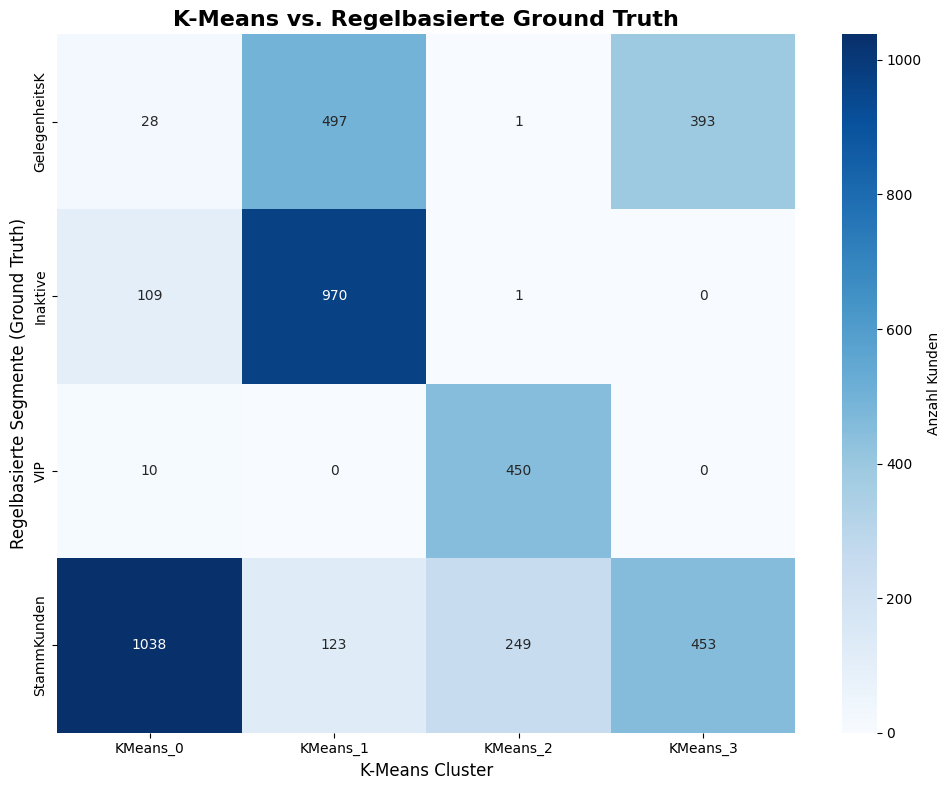


Plot gespeichert


In [95]:
print("\n" + "="*80)
print("SCHRITT 3: ALLE METHODEN MIT REGELBASIERTER GROUND TRUTH VERGLEICHEN")
print("="*80)

from sklearn.metrics import accuracy_score, adjusted_rand_score, normalized_mutual_info_score

# 1. K-MEANS vs. REGELBASIERT

print("\n" + "="*80)
print("1. K-MEANS vs. REGELBASIERTE GROUND TRUTH")
print("="*80)

conf_matrix_kmeans_rule = confusion_matrix(
    rfm['RuleBased_Cluster'],  # Ground Truth
    rfm['KMeans_Cluster']       # K-Means
)

print("\nConfusion Matrix:")
print("                  KMeans_0  KMeans_1  KMeans_2  KMeans_3")
rule_names = ['GelegenheitsK', 'Inaktive', 'VIP', 'StammKunden']
for i, name in enumerate(rule_names):
    print(f"{name:15s}   {conf_matrix_kmeans_rule[i]}")

# Visualisierung
plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix_kmeans_rule, 
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=[f'KMeans_{i}' for i in range(4)],
    yticklabels=rule_names,
    cbar_kws={'label': 'Anzahl Kunden'}
)
plt.title('K-Means vs. Regelbasierte Ground Truth', fontsize=16, fontweight='bold')
plt.xlabel('K-Means Cluster', fontsize=12)
plt.ylabel('Regelbasierte Segmente (Ground Truth)', fontsize=12)
plt.tight_layout()
plt.savefig('../results/reports1/confusion_matrix_rule_vs_kmeans.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nPlot gespeichert!")


2. HAC vs. REGELBASIERTE GROUND TRUTH

Confusion Matrix:
HAC_0  HAC_1  HAC_2  HAC_3
GelegenheitsK     [739 172   7   1]
Inaktive          [   0 1050   30    0]
VIP               [  0   0   0 460]
StammKunden       [323 255 933 352]


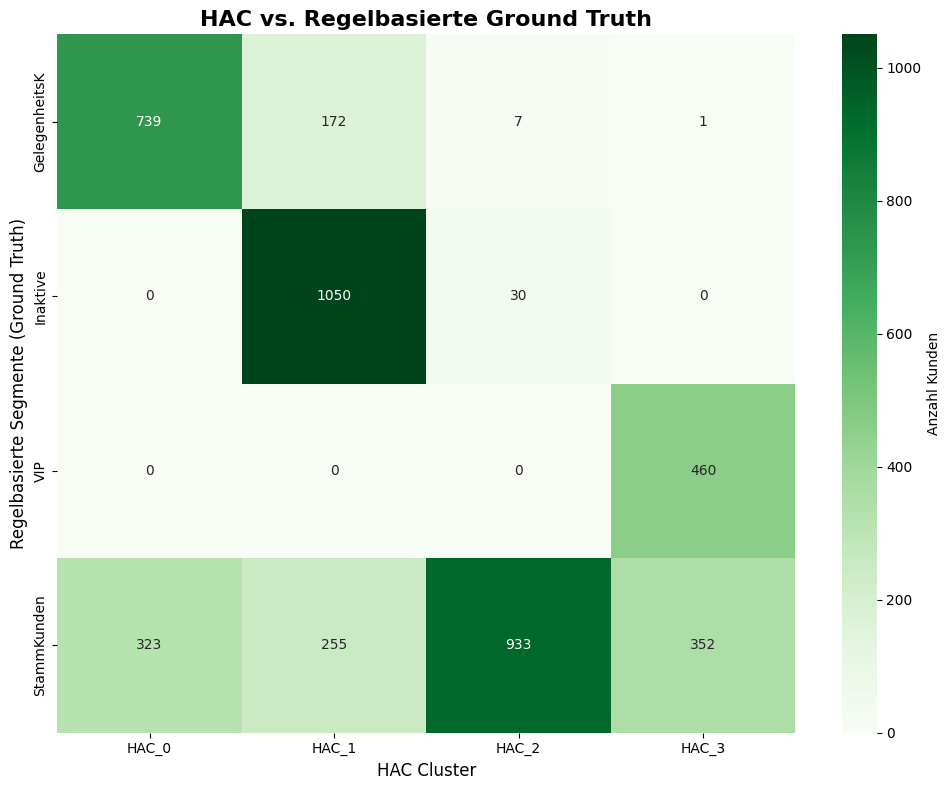


Plot gespeichert


In [97]:
# 2. HAC vs. REGELBASIERT

print("\n" + "="*80)
print("2. HAC vs. REGELBASIERTE GROUND TRUTH")
print("="*80)

conf_matrix_hac_rule = confusion_matrix(
    rfm['RuleBased_Cluster'],
    rfm['HAC_Cluster']
)

print("\nConfusion Matrix:")
print("HAC_0  HAC_1  HAC_2  HAC_3")
for i, name in enumerate(rule_names):
    print(f"{name:15s}   {conf_matrix_hac_rule[i]}")

plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix_hac_rule, 
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=[f'HAC_{i}' for i in range(4)],
    yticklabels=rule_names,
    cbar_kws={'label': 'Anzahl Kunden'}
)
plt.title('HAC vs. Regelbasierte Ground Truth', fontsize=16, fontweight='bold')
plt.xlabel('HAC Cluster', fontsize=12)
plt.ylabel('Regelbasierte Segmente (Ground Truth)', fontsize=12)
plt.tight_layout()
plt.savefig('../results/reports1/confusion_matrix_rule_vs_hac.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nPlot gespeichert")



3. DBSCAN vs. REGELBASIERTE GROUND TRUTH (ohne Noise)

Confusion Matrix:
                  DBSCAN_0  DBSCAN_1  DBSCAN_2
GelegenheitsK     [ 15 765 106   0]
Inaktive          [111 712 230   0]
VIP               [405   0   0   0]
StammKunden       [1331    0  490    0]


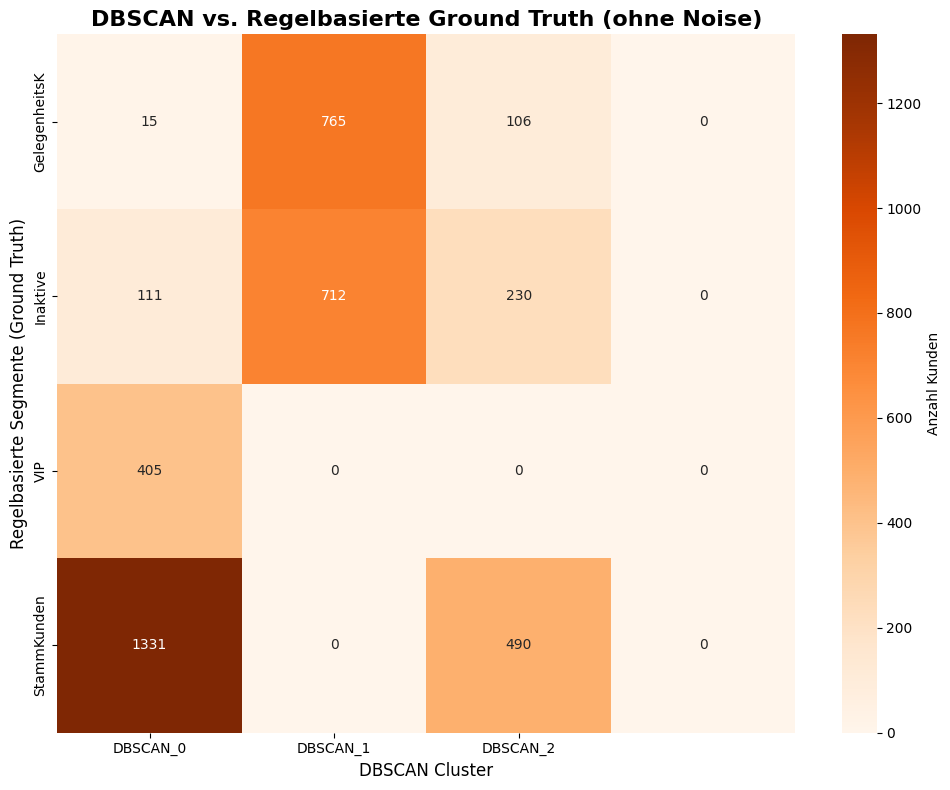


Plot gespeichert


In [98]:
# 3. DBSCAN vs. REGELBASIERT

print("\n" + "="*80)
print("3. DBSCAN vs. REGELBASIERTE GROUND TRUTH (ohne Noise)")
print("="*80)

mask_dbscan = rfm['DBSCAN_Cluster'] != -1

conf_matrix_dbscan_rule = confusion_matrix(
    rfm.loc[mask_dbscan, 'RuleBased_Cluster'],
    rfm.loc[mask_dbscan, 'DBSCAN_Cluster']
)

print("\nConfusion Matrix:")
print("                  DBSCAN_0  DBSCAN_1  DBSCAN_2")
for i, name in enumerate(rule_names):
    print(f"{name:15s}   {conf_matrix_dbscan_rule[i]}")

plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix_dbscan_rule, 
    annot=True,
    fmt='d',
    cmap='Oranges',
    xticklabels=[f'DBSCAN_{i}' for i in range(3)],
    yticklabels=rule_names,
    cbar_kws={'label': 'Anzahl Kunden'}
)
plt.title('DBSCAN vs. Regelbasierte Ground Truth (ohne Noise)', fontsize=16, fontweight='bold')
plt.xlabel('DBSCAN Cluster', fontsize=12)
plt.ylabel('Regelbasierte Segmente (Ground Truth)', fontsize=12)
plt.tight_layout()
plt.savefig('../results/reports1/confusion_matrix_rule_vs_dbscan.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nPlot gespeichert")


4. OPTICS vs. REGELBASIERTE GROUND TRUTH (ohne Noise)

Confusion Matrix:
                  OPTICS_0  OPTICS_1  OPTICS_2  OPTICS_3
GelegenheitsK     [  0   7  79 714]
Inaktive          [ 19  58 217 706]
VIP               [0 0 0 0]
StammKunden       [319 351 466   0]


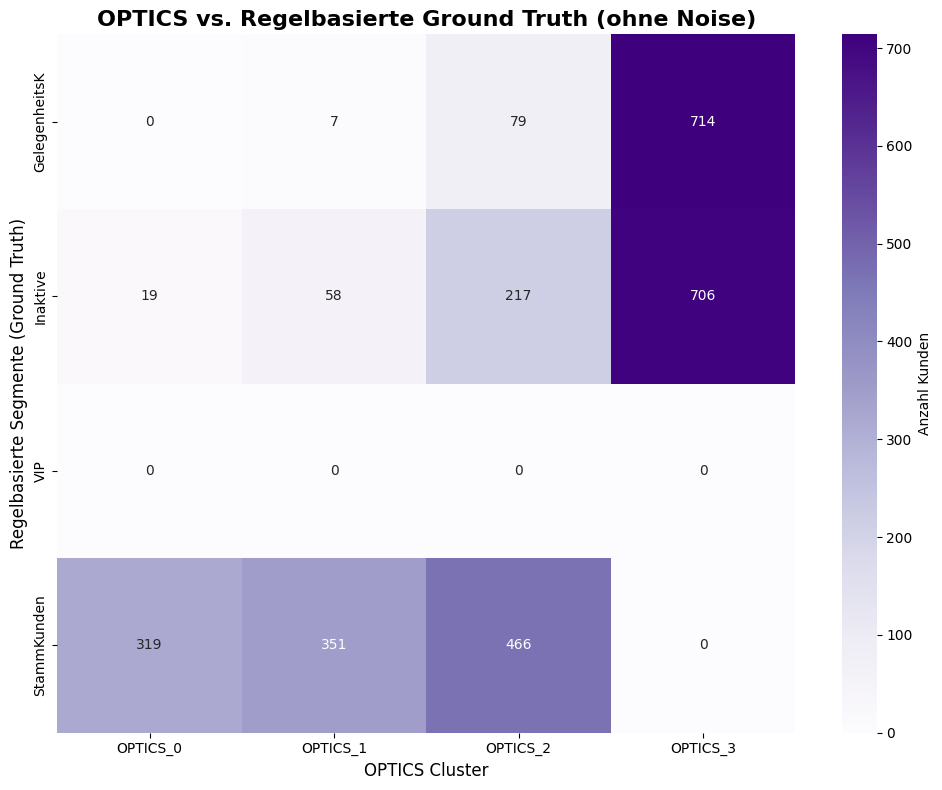


Plot gespeichert!

ALLE CONFUSION MATRICES ERSTELLT!


In [99]:
# 4. OPTICS vs. REGELBASIERT

print("\n" + "="*80)
print("4. OPTICS vs. REGELBASIERTE GROUND TRUTH (ohne Noise)")
print("="*80)

mask_optics = rfm['OPTICS_Cluster'] != -1

conf_matrix_optics_rule = confusion_matrix(
    rfm.loc[mask_optics, 'RuleBased_Cluster'],
    rfm.loc[mask_optics, 'OPTICS_Cluster']
)

print("\nConfusion Matrix:")
print("                  OPTICS_0  OPTICS_1  OPTICS_2  OPTICS_3")
for i, name in enumerate(rule_names):
    print(f"{name:15s}   {conf_matrix_optics_rule[i]}")

plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix_optics_rule, 
    annot=True,
    fmt='d',
    cmap='Purples',
    xticklabels=[f'OPTICS_{i}' for i in range(4)],
    yticklabels=rule_names,
    cbar_kws={'label': 'Anzahl Kunden'}
)
plt.title('OPTICS vs. Regelbasierte Ground Truth (ohne Noise)', fontsize=16, fontweight='bold')
plt.xlabel('OPTICS Cluster', fontsize=12)
plt.ylabel('Regelbasierte Segmente (Ground Truth)', fontsize=12)
plt.tight_layout()
plt.savefig('../results/reports1/confusion_matrix_rule_vs_optics.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nPlot gespeichert!")

print("\n" + "="*80)
print("ALLE CONFUSION MATRICES ERSTELLT!")
print("="*80)


QUANTITATIVE ZUSAMMENFASSUNG: ALLE METHODEN vs. REGELBASIERT

VERGLEICH ALLER METHODEN MIT REGELBASIERTER GROUND TRUTH
   Methode     ARI     NMI  Homogeneity  Completeness  V-Measure
0  K-Means  0.3505  0.4500       0.4606        0.4399     0.4500
1      HAC  0.4090  0.5177       0.5349        0.5017     0.5177
2   DBSCAN  0.3552  0.4212       0.3851        0.4647     0.4212
3   OPTICS  0.2730  0.3692       0.3928        0.3484     0.3692

RANKING (höher = besser):

1. Adjusted Rand Index (ARI):
   - HAC: 0.4090
   - DBSCAN: 0.3552
   - K-Means: 0.3505
   - OPTICS: 0.2730

2. Normalized Mutual Information (NMI):
   - HAC: 0.5177
   - K-Means: 0.4500
   - DBSCAN: 0.4212
   - OPTICS: 0.3692

3. V-Measure (harmonischer Mittelwert von Homogeneity & Completeness):
   - HAC: 0.5177
   - K-Means: 0.4500
   - DBSCAN: 0.4212
   - OPTICS: 0.3692

VISUALISIERUNG ERSTELLEN...


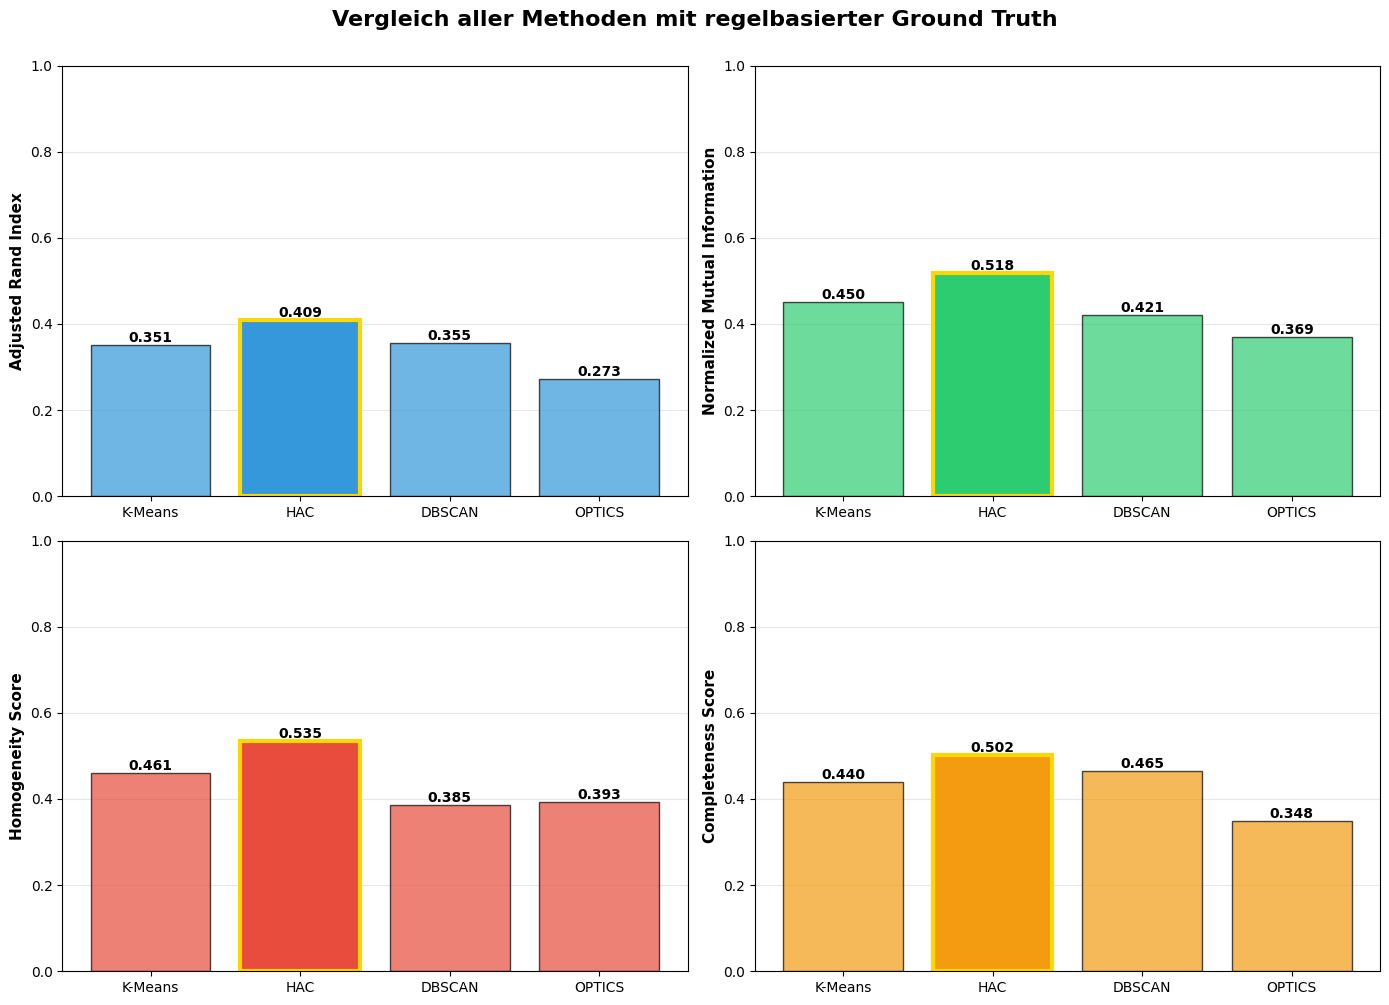


Plot gespeichert: ../results/reports1/rule_based_comparison_metrics.png
Tabelle gespeichert: ../results/reports1/rule_based_comparison_metrics.csv

QUANTITATIVE ZUSAMMENFASSUNG ABGESCHLOSSEN!


In [101]:
print("\n" + "="*80)
print("QUANTITATIVE ZUSAMMENFASSUNG: ALLE METHODEN vs. REGELBASIERT")
print("="*80)

from sklearn.metrics import (
    adjusted_rand_score, 
    normalized_mutual_info_score,
    homogeneity_score,
    completeness_score,
    v_measure_score
)

# ============================================================================
# METRIKEN BERECHNEN
# ============================================================================

results_summary = []

# 1. K-MEANS
ari_kmeans = adjusted_rand_score(rfm['RuleBased_Cluster'], rfm['KMeans_Cluster'])
nmi_kmeans = normalized_mutual_info_score(rfm['RuleBased_Cluster'], rfm['KMeans_Cluster'])
homo_kmeans = homogeneity_score(rfm['RuleBased_Cluster'], rfm['KMeans_Cluster'])
comp_kmeans = completeness_score(rfm['RuleBased_Cluster'], rfm['KMeans_Cluster'])
v_kmeans = v_measure_score(rfm['RuleBased_Cluster'], rfm['KMeans_Cluster'])

results_summary.append({
    'Methode': 'K-Means',
    'ARI': ari_kmeans,
    'NMI': nmi_kmeans,
    'Homogeneity': homo_kmeans,
    'Completeness': comp_kmeans,
    'V-Measure': v_kmeans
})

# 2. HAC
ari_hac = adjusted_rand_score(rfm['RuleBased_Cluster'], rfm['HAC_Cluster'])
nmi_hac = normalized_mutual_info_score(rfm['RuleBased_Cluster'], rfm['HAC_Cluster'])
homo_hac = homogeneity_score(rfm['RuleBased_Cluster'], rfm['HAC_Cluster'])
comp_hac = completeness_score(rfm['RuleBased_Cluster'], rfm['HAC_Cluster'])
v_hac = v_measure_score(rfm['RuleBased_Cluster'], rfm['HAC_Cluster'])

results_summary.append({
    'Methode': 'HAC',
    'ARI': ari_hac,
    'NMI': nmi_hac,
    'Homogeneity': homo_hac,
    'Completeness': comp_hac,
    'V-Measure': v_hac
})

# 3. DBSCAN (ohne Noise)
mask_dbscan = rfm['DBSCAN_Cluster'] != -1
ari_dbscan = adjusted_rand_score(
    rfm.loc[mask_dbscan, 'RuleBased_Cluster'], 
    rfm.loc[mask_dbscan, 'DBSCAN_Cluster']
)
nmi_dbscan = normalized_mutual_info_score(
    rfm.loc[mask_dbscan, 'RuleBased_Cluster'], 
    rfm.loc[mask_dbscan, 'DBSCAN_Cluster']
)
homo_dbscan = homogeneity_score(
    rfm.loc[mask_dbscan, 'RuleBased_Cluster'], 
    rfm.loc[mask_dbscan, 'DBSCAN_Cluster']
)
comp_dbscan = completeness_score(
    rfm.loc[mask_dbscan, 'RuleBased_Cluster'], 
    rfm.loc[mask_dbscan, 'DBSCAN_Cluster']
)
v_dbscan = v_measure_score(
    rfm.loc[mask_dbscan, 'RuleBased_Cluster'], 
    rfm.loc[mask_dbscan, 'DBSCAN_Cluster']
)

results_summary.append({
    'Methode': 'DBSCAN',
    'ARI': ari_dbscan,
    'NMI': nmi_dbscan,
    'Homogeneity': homo_dbscan,
    'Completeness': comp_dbscan,
    'V-Measure': v_dbscan
})

# 4. OPTICS (ohne Noise)
mask_optics = rfm['OPTICS_Cluster'] != -1
ari_optics = adjusted_rand_score(
    rfm.loc[mask_optics, 'RuleBased_Cluster'], 
    rfm.loc[mask_optics, 'OPTICS_Cluster']
)
nmi_optics = normalized_mutual_info_score(
    rfm.loc[mask_optics, 'RuleBased_Cluster'], 
    rfm.loc[mask_optics, 'OPTICS_Cluster']
)
homo_optics = homogeneity_score(
    rfm.loc[mask_optics, 'RuleBased_Cluster'], 
    rfm.loc[mask_optics, 'OPTICS_Cluster']
)
comp_optics = completeness_score(
    rfm.loc[mask_optics, 'RuleBased_Cluster'], 
    rfm.loc[mask_optics, 'OPTICS_Cluster']
)
v_optics = v_measure_score(
    rfm.loc[mask_optics, 'RuleBased_Cluster'], 
    rfm.loc[mask_optics, 'OPTICS_Cluster']
)

results_summary.append({
    'Methode': 'OPTICS',
    'ARI': ari_optics,
    'NMI': nmi_optics,
    'Homogeneity': homo_optics,
    'Completeness': comp_optics,
    'V-Measure': v_optics
})

# ============================================================================
# ERGEBNISSE ANZEIGEN
# ============================================================================

import pandas as pd

df_summary = pd.DataFrame(results_summary)

print("\n" + "="*80)
print("VERGLEICH ALLER METHODEN MIT REGELBASIERTER GROUND TRUTH")
print("="*80)
print(df_summary.round(4))

# Beste Werte hervorheben
print("\n" + "="*80)
print("RANKING (höher = besser):")
print("="*80)

print("\n1. Adjusted Rand Index (ARI):")
best_ari = df_summary.loc[df_summary['ARI'].idxmax()]
print(f"   - {best_ari['Methode']}: {best_ari['ARI']:.4f}")
df_sorted = df_summary.sort_values('ARI', ascending=False)
for i, row in df_sorted.iterrows():
    if i != df_summary['ARI'].idxmax():
        print(f"   - {row['Methode']}: {row['ARI']:.4f}")

print("\n2. Normalized Mutual Information (NMI):")
best_nmi = df_summary.loc[df_summary['NMI'].idxmax()]
print(f"   - {best_nmi['Methode']}: {best_nmi['NMI']:.4f}")
df_sorted = df_summary.sort_values('NMI', ascending=False)
for i, row in df_sorted.iterrows():
    if i != df_summary['NMI'].idxmax():
        print(f"   - {row['Methode']}: {row['NMI']:.4f}")

print("\n3. V-Measure (harmonischer Mittelwert von Homogeneity & Completeness):")
best_v = df_summary.loc[df_summary['V-Measure'].idxmax()]
print(f"   - {best_v['Methode']}: {best_v['V-Measure']:.4f}")
df_sorted = df_summary.sort_values('V-Measure', ascending=False)
for i, row in df_sorted.iterrows():
    if i != df_summary['V-Measure'].idxmax():
        print(f"   - {row['Methode']}: {row['V-Measure']:.4f}")

# ============================================================================
# VISUALISIERUNG
# ============================================================================

print("\n" + "="*80)
print("VISUALISIERUNG ERSTELLEN...")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['ARI', 'NMI', 'Homogeneity', 'Completeness']
titles = ['Adjusted Rand Index', 'Normalized Mutual Information', 
          'Homogeneity Score', 'Completeness Score']
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    row = idx // 2
    col = idx % 2
    
    ax = axes[row, col]
    
    bars = ax.bar(df_summary['Methode'], df_summary[metric], color=colors[idx], alpha=0.7, edgecolor='black')
    
    # Beste Methode hervorheben
    best_idx = df_summary[metric].idxmax()
    bars[best_idx].set_color(colors[idx])
    bars[best_idx].set_alpha(1.0)
    bars[best_idx].set_edgecolor('gold')
    bars[best_idx].set_linewidth(3)
    
    ax.set_ylabel(title, fontsize=11, fontweight='bold')
    ax.set_ylim(0, 1)
    ax.grid(axis='y', alpha=0.3)
    ax.set_axisbelow(True)
    
    # Werte auf Balken schreiben
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.suptitle('Vergleich aller Methoden mit regelbasierter Ground Truth', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('../results/reports1/rule_based_comparison_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nPlot gespeichert: ../results/reports1/rule_based_comparison_metrics.png")

# CSV speichern
df_summary.to_csv('../results/reports1/rule_based_comparison_metrics.csv', index=False)
print("Tabelle gespeichert: ../results/reports1/rule_based_comparison_metrics.csv")

print("\n" + "="*80)
print("QUANTITATIVE ZUSAMMENFASSUNG ABGESCHLOSSEN!")
print("="*80)

In [102]:
print("="*80)
print("TESTDATEN-EVALUATION: MODELL-GENERALISIERUNG")
print("="*80)

# ============================================================================
# 1. TESTDATEN LADEN
# ============================================================================
print("\n" + "="*80)
print("1. TESTDATEN LADEN")
print("="*80)

# Testdaten laden
test_file = '../data/raw/OnlineRetail_test.csv'
df_test = pd.read_csv(test_file, encoding='ISO-8859-1')

print(f"Testdaten geladen: {df_test.shape}")
print(f"\nErste Zeilen:")
print(df_test.head())

# ============================================================================
# 2. TESTDATEN BEREINIGEN (GLEICHE SCHRITTE WIE BEI TRAINING!)
# ============================================================================
print("\n" + "="*80)
print("2. TESTDATEN BEREINIGEN")
print("="*80)

print(f"Vor Bereinigung: {df_test.shape}")

# Fehlende CustomerID entfernen
df_test = df_test[df_test['CustomerID'].notna()]

# Negative Werte entfernen
df_test = df_test[df_test['Quantity'] > 0]
df_test = df_test[df_test['UnitPrice'] > 0]

# TotalAmount berechnen
df_test['TotalAmount'] = df_test['Quantity'] * df_test['UnitPrice']

# InvoiceDate zu datetime
df_test['InvoiceDate'] = pd.to_datetime(df_test['InvoiceDate'])

print(f"Nach Bereinigung: {df_test.shape}")
print(f"Anzahl Kunden in Testdaten: {df_test['CustomerID'].nunique()}")

# ============================================================================
# 3. RFM FÜR TESTDATEN BERECHNEN
# ============================================================================
print("\n" + "="*80)
print("3. RFM FÜR TESTDATEN BERECHNEN")
print("="*80)

# Referenzdatum (letztes Datum in Testdaten + 1 Tag)
reference_date_test = df_test['InvoiceDate'].max() + pd.Timedelta(days=1)

print(f"Referenzdatum für Testdaten: {reference_date_test}")

# RFM berechnen
rfm_test = df_test.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date_test - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                          # Frequency
    'TotalAmount': 'sum'                                             # Monetary
}).reset_index()

rfm_test.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print(f"\nRFM Testdaten erstellt: {rfm_test.shape}")
print(f"\nRFM-Statistiken (Testdaten):")
print(rfm_test[['Recency', 'Frequency', 'Monetary']].describe())

# ============================================================================
# 4. SKALIERUNG MIT DEM GLEICHEN SCALER WIE TRAINING!
# ============================================================================
print("\n" + "="*80)
print("4. TESTDATEN SKALIEREN (mit Training-Scaler!)")
print("="*80)

# WICHTIG: Verwende den GLEICHEN Scaler wie bei Training!
# (Der Scaler wurde auf Trainingsdaten gefittet)

from sklearn.preprocessing import StandardScaler

# Neuen Scaler mit Training-Daten fitten (WIEDERHOLEN!)
scaler_test = StandardScaler()
scaler_test.fit(rfm[['Recency', 'Frequency', 'Monetary']])  # ← MIT TRAININGS-RFM!

# Testdaten transformieren
rfm_test_scaled = scaler_test.transform(rfm_test[['Recency', 'Frequency', 'Monetary']])

# Als DataFrame
rfm_test_scaled_df = pd.DataFrame(
    rfm_test_scaled,
    columns=['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled'],
    index=rfm_test.index
)

# CustomerID hinzufügen
rfm_test_scaled_df['CustomerID'] = rfm_test['CustomerID'].values

print("Testdaten skaliert!")
print(f"\nSkalierte Testdaten: {rfm_test_scaled_df.shape}")

print("\n" + "="*80)
print("TESTDATEN VORBEREITUNG ABGESCHLOSSEN!")
print("="*80)

TESTDATEN-EVALUATION: MODELL-GENERALISIERUNG

1. TESTDATEN LADEN
Testdaten geladen: (108382, 8)

Erste Zeilen:
  InvoiceNo StockCode                       Description  Quantity  \
0    555200     71459    HANGING JAM JAR T-LIGHT HOLDER        24   
1    554974     21128                GOLD FISHING GNOME         4   
2    550972     21086       SET/6 RED SPOTTY PAPER CUPS         4   
3    576652     22812  PACK 3 BOXES CHRISTMAS PANETTONE         3   
4    546157     22180                    RETROSPOT LAMP         2   

        InvoiceDate  UnitPrice  CustomerID         Country  
0    6/1/2011 12:05       0.85     17315.0  United Kingdom  
1   5/27/2011 17:14       6.95     14031.0  United Kingdom  
2   4/21/2011 17:05       0.65     14031.0  United Kingdom  
3  11/16/2011 10:39       1.95     17198.0  United Kingdom  
4    3/10/2011 8:40       9.95     13502.0  United Kingdom  

2. TESTDATEN BEREINIGEN
Vor Bereinigung: (108382, 8)
Nach Bereinigung: (79425, 9)
Anzahl Kunden in Testdate

In [103]:
print("\n" + "="*80)
print("SCHRITT 2: TRAINIERTE MODELLE AUF TESTDATEN ANWENDEN")
print("="*80)

# ============================================================================
# 1. K-MEANS AUF TESTDATEN
# ============================================================================
print("\n" + "="*80)
print("1. K-MEANS: Testdaten zu existierenden Clustern zuordnen")
print("="*80)

# WICHTIG: Verwende das TRAINIERTE Modell!
# K-Means wurde bereits auf Trainingsdaten gefittet

from sklearn.cluster import KMeans

# Das trainierte K-Means Modell (mit 4 Clustern)
# Falls du das Modell nicht gespeichert hast, müssen wir es neu erstellen
kmeans_trained = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_trained.fit(rfm_scaled_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']])

# Testdaten zu Clustern zuordnen (predict, NICHT fit!)
kmeans_test_labels = kmeans_trained.predict(
    rfm_test_scaled_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']]
)

rfm_test['KMeans_Cluster'] = kmeans_test_labels

print("K-Means Labels für Testdaten erstellt!")
print(f"\nCluster-Verteilung (Testdaten):")
print(rfm_test['KMeans_Cluster'].value_counts().sort_index())

# RFM-Profile
print("\n" + "-"*80)
print("RFM-Profile K-Means (Testdaten):")
print("-"*80)
kmeans_test_profile = rfm_test.groupby('KMeans_Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
kmeans_test_profile['Anzahl'] = rfm_test['KMeans_Cluster'].value_counts().sort_index()
print(kmeans_test_profile.round(2))

# ============================================================================
# 2. HAC AUF TESTDATEN
# ============================================================================
print("\n" + "="*80)
print("2. HAC: Testdaten zu existierenden Clustern zuordnen")
print("="*80)

from scipy.cluster.hierarchy import linkage, fcluster

# Für HAC müssen wir die Cluster-Zentren aus Training verwenden
# ODER: Wir fitten HAC neu auf Trainingsdaten

from sklearn.cluster import AgglomerativeClustering

# HAC neu fitten auf Trainingsdaten
hac_trained = AgglomerativeClustering(n_clusters=4, linkage='ward')
hac_trained.fit(rfm_scaled_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']])

# Für Testdaten: Zuordnung zum nächsten Cluster-Zentrum
# HAC hat keine predict()-Methode, daher nutzen wir Nearest-Centroid

from sklearn.neighbors import NearestCentroid

# Cluster-Zentren aus Trainingsdaten berechnen
clf = NearestCentroid()
clf.fit(
    rfm_scaled_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']], 
    rfm_scaled_df['HAC_Cluster']
)

# Testdaten zu Clustern zuordnen
hac_test_labels = clf.predict(
    rfm_test_scaled_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']]
)

rfm_test['HAC_Cluster'] = hac_test_labels

print("HAC Labels für Testdaten erstellt!")
print(f"\nCluster-Verteilung (Testdaten):")
print(rfm_test['HAC_Cluster'].value_counts().sort_index())

# RFM-Profile
print("\n" + "-"*80)
print("RFM-Profile HAC (Testdaten):")
print("-"*80)
hac_test_profile = rfm_test.groupby('HAC_Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
hac_test_profile['Anzahl'] = rfm_test['HAC_Cluster'].value_counts().sort_index()
print(hac_test_profile.round(2))

# ============================================================================
# 3. DBSCAN AUF TESTDATEN
# ============================================================================
print("\n" + "="*80)
print("3. DBSCAN: Testdaten neu clustern")
print("="*80)

from sklearn.cluster import DBSCAN

# DBSCAN mit gleichen Parametern wie Training
dbscan_test = DBSCAN(eps=0.4, min_samples=10)
dbscan_test_labels = dbscan_test.fit_predict(
    rfm_test_scaled_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']]
)

rfm_test['DBSCAN_Cluster'] = dbscan_test_labels

n_clusters_dbscan = len(set(dbscan_test_labels)) - (1 if -1 in dbscan_test_labels else 0)
n_noise_dbscan = list(dbscan_test_labels).count(-1)

print(f"DBSCAN Labels für Testdaten erstellt!")
print(f"Anzahl Cluster: {n_clusters_dbscan}")
print(f"Anzahl Noise: {n_noise_dbscan} ({n_noise_dbscan/len(rfm_test)*100:.1f}%)")

print(f"\nCluster-Verteilung (Testdaten, ohne Noise):")
print(rfm_test[rfm_test['DBSCAN_Cluster'] != -1]['DBSCAN_Cluster'].value_counts().sort_index())

# ============================================================================
# 4. OPTICS AUF TESTDATEN
# ============================================================================
print("\n" + "="*80)
print("4. OPTICS: Testdaten neu clustern")
print("="*80)

from sklearn.cluster import OPTICS

# OPTICS mit gleichen Parametern wie Training
optics_test = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
optics_test_labels = optics_test.fit_predict(
    rfm_test_scaled_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']]
)

rfm_test['OPTICS_Cluster'] = optics_test_labels

n_clusters_optics = len(set(optics_test_labels)) - (1 if -1 in optics_test_labels else 0)
n_noise_optics = list(optics_test_labels).count(-1)

print(f"OPTICS Labels für Testdaten erstellt!")
print(f"Anzahl Cluster: {n_clusters_optics}")
print(f"Anzahl Noise: {n_noise_optics} ({n_noise_optics/len(rfm_test)*100:.1f}%)")

print(f"\nCluster-Verteilung (Testdaten, ohne Noise):")
if n_clusters_optics > 0:
    print(rfm_test[rfm_test['OPTICS_Cluster'] != -1]['OPTICS_Cluster'].value_counts().sort_index())

print("\n" + "="*80)
print("ALLE MODELLE AUF TESTDATEN ANGEWENDET!")
print("="*80)


SCHRITT 2: TRAINIERTE MODELLE AUF TESTDATEN ANWENDEN

1. K-MEANS: Testdaten zu existierenden Clustern zuordnen
K-Means Labels für Testdaten erstellt!

Cluster-Verteilung (Testdaten):
KMeans_Cluster
0     407
1    1170
2    2386
3     128
Name: count, dtype: int64

--------------------------------------------------------------------------------
RFM-Profile K-Means (Testdaten):
--------------------------------------------------------------------------------
                Recency  Frequency  Monetary  Anzahl
KMeans_Cluster                                      
0                 64.81       7.94    899.78     407
1                235.24       1.39    109.99    1170
2                 36.66       2.98    245.29    2386
3                  8.93      27.11   5593.10     128

2. HAC: Testdaten zu existierenden Clustern zuordnen
HAC Labels für Testdaten erstellt!

Cluster-Verteilung (Testdaten):
HAC_Cluster
0    2111
1    1183
2     673
3     124
Name: count, dtype: int64

--------------------